# Instalación de librerias

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


# Importacion del caso de negocio

In [7]:
credito = pd.read_csv('2_DS_creditos.csv',sep=";")


# Exploración de datos

In [8]:
credito.columns

Index(['ID', 'Default', 'Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'],
      dtype='object')

Pre evaluación crediticia automática

El banco Wiesse ha registrado problemas en su cartera de créditos otorgados. Entonces deciden que quieren diseñar nuevas estrategias control de entrega de prestamos con un sistema de preevaluación soportado en análisis de datos.

Un buen diseño de análisis exploratorio conllevará a diagnosticar las características de que alguien experimente dificultades financieras en los próximos dos años. Los hallazgos que se obtendrán ayudaran a los ejecutivo del banco para tener un control del riesgo de entrega de prestamos.

Para lograr esta labor se ha revisado 3 años de otorgación histórica crediticia de los clientes en prestamos.

In [9]:
credito.head()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Default == Cliente con más de 90 dias sin pagar su prestamo

Prct_uso_tc ## Porcentaje del uso de tarjeta de credito el último mes

Edad ## Edad

Nro_prestao_retrasados ## Numero de prestamos con retraso en el pago de más de 3 meses en los últimos 3 años

Prct_deuda_vs_ingresos ## Ratio de deuda financiera vs ingresos del clientes

Mto_ingreso_mensual ## Monto de ingreso mensual

Nro_prod_financieros_deuda ## Nro de prestamos (incluido creditos vehiculares o hipotecario) y nro de tarjetas de credito ultimo año

Nro_retraso_60dias ## Nro de veces que el cliente se ha retrasado más de 60 dias los últimons 3 años

Nro_creditos_hipotecarios ## Nro de creditos hipotecarios

Nro_retraso_ultm3anios ## Nro de retrasos en pagos de más de 30 dias en los úlitmos 3 años

Nro_dependiente == Nro de dependientes

In [10]:
credito.describe()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [11]:
credito.shape

(150000, 12)

In [12]:
credito ['Default'].unique()

array([1, 0])

In [13]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          150000 non-null  int64  
 1   Default                     150000 non-null  int64  
 2   Prct_uso_tc                 150000 non-null  float64
 3   Edad                        150000 non-null  int64  
 4   Nro_prestao_retrasados      150000 non-null  int64  
 5   Prct_deuda_vs_ingresos      150000 non-null  float64
 6   Mto_ingreso_mensual         120269 non-null  float64
 7   Nro_prod_financieros_deuda  150000 non-null  int64  
 8   Nro_retraso_60dias          150000 non-null  int64  
 9   Nro_creditos_hipotecarios   150000 non-null  int64  
 10  Nro_retraso_ultm3anios      150000 non-null  int64  
 11  Nro_dependiente             146076 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


<Axes: xlabel='Default', ylabel='count'>

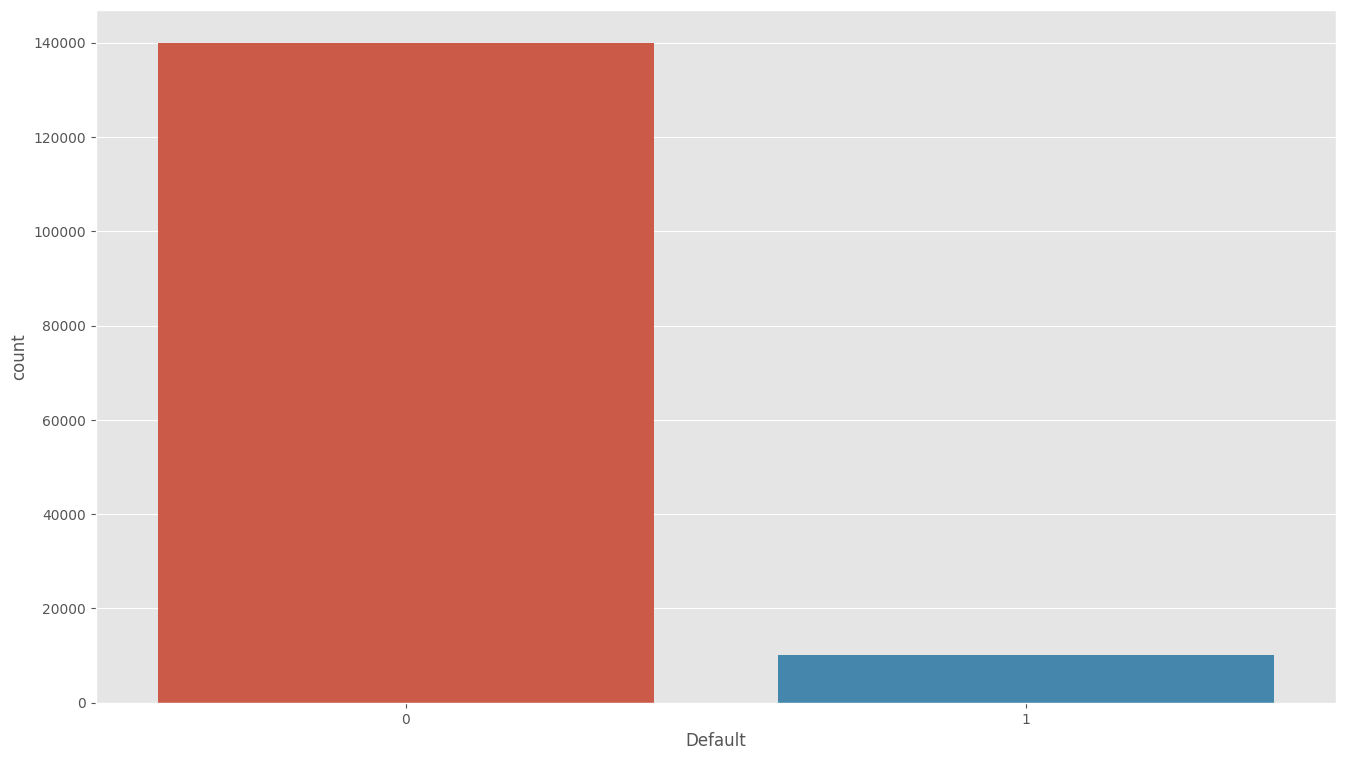

In [14]:
sns.countplot(data=credito, x ="Default")

In [15]:
credito.groupby('Default').size()

Default
0    139974
1     10026
dtype: int64

In [16]:
a=10026/150000*100
b=139974/150000*100

print (a)
print (b)

6.683999999999999
93.316


In [17]:
mi=(29731/150000)*100
nd=(3920/150000)*100

print (mi)
print (nd)

19.820666666666668
2.6133333333333333


In [18]:
import missingno as msno

<Axes: >

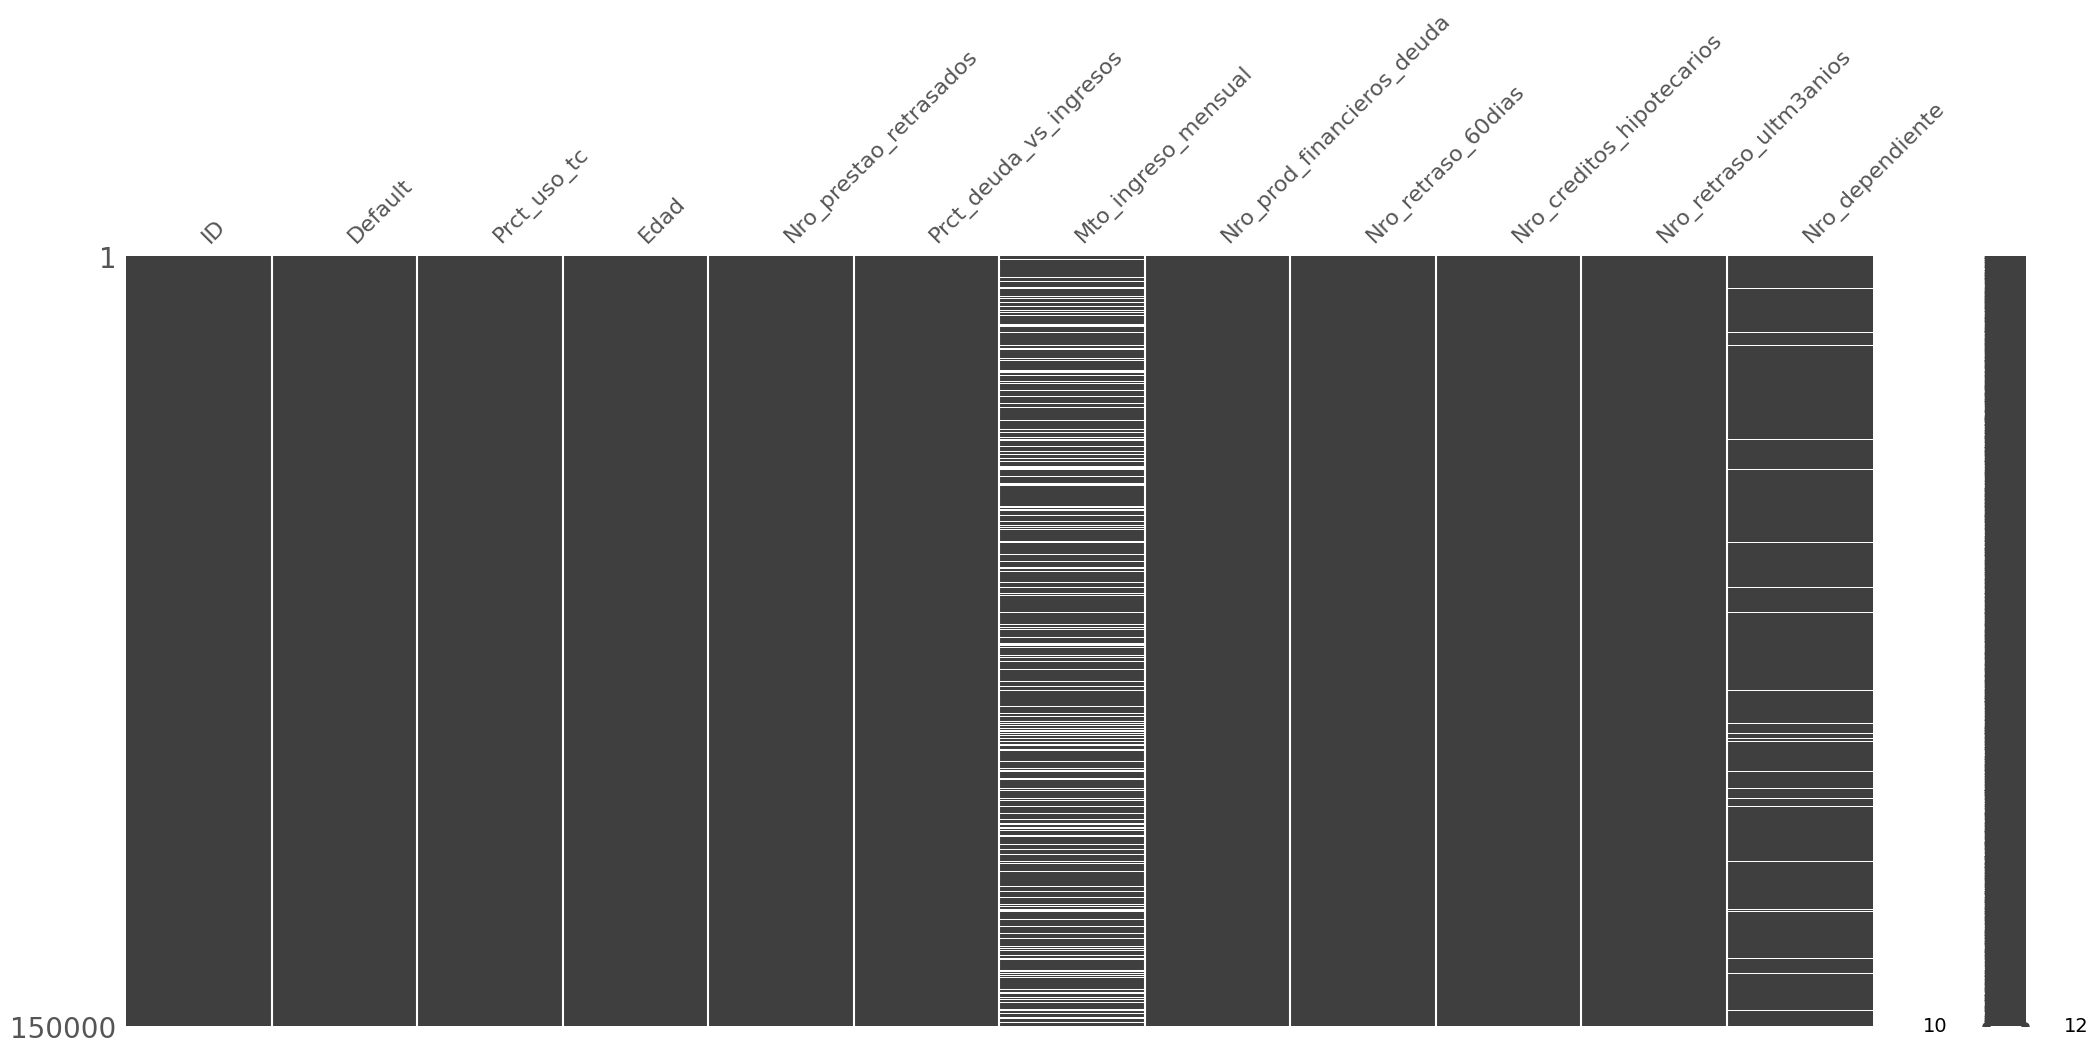

In [19]:
msno.matrix(credito)

In [20]:
credito.isna().sum()

ID                                0
Default                           0
Prct_uso_tc                       0
Edad                              0
Nro_prestao_retrasados            0
Prct_deuda_vs_ingresos            0
Mto_ingreso_mensual           29731
Nro_prod_financieros_deuda        0
Nro_retraso_60dias                0
Nro_creditos_hipotecarios         0
Nro_retraso_ultm3anios            0
Nro_dependiente                3924
dtype: int64

# Tratamiento de datos


In [21]:
credito[credito['Mto_ingreso_mensual'].isnull()]

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
6,7,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
8,9,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
16,17,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
32,33,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
41,42,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149976,149977,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0
149977,149978,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0
149984,149985,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0
149992,149993,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0


In [22]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          150000 non-null  int64  
 1   Default                     150000 non-null  int64  
 2   Prct_uso_tc                 150000 non-null  float64
 3   Edad                        150000 non-null  int64  
 4   Nro_prestao_retrasados      150000 non-null  int64  
 5   Prct_deuda_vs_ingresos      150000 non-null  float64
 6   Mto_ingreso_mensual         120269 non-null  float64
 7   Nro_prod_financieros_deuda  150000 non-null  int64  
 8   Nro_retraso_60dias          150000 non-null  int64  
 9   Nro_creditos_hipotecarios   150000 non-null  int64  
 10  Nro_retraso_ultm3anios      150000 non-null  int64  
 11  Nro_dependiente             146076 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [23]:
credito= credito.fillna({'Mto_ingreso_mensual':0,'Nro_dependiente':0 })

In [24]:
Variables= ['Prct_uso_tc','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Nro_retraso_60dias','Nro_retraso_ultm3anios','Mto_ingreso_mensual']

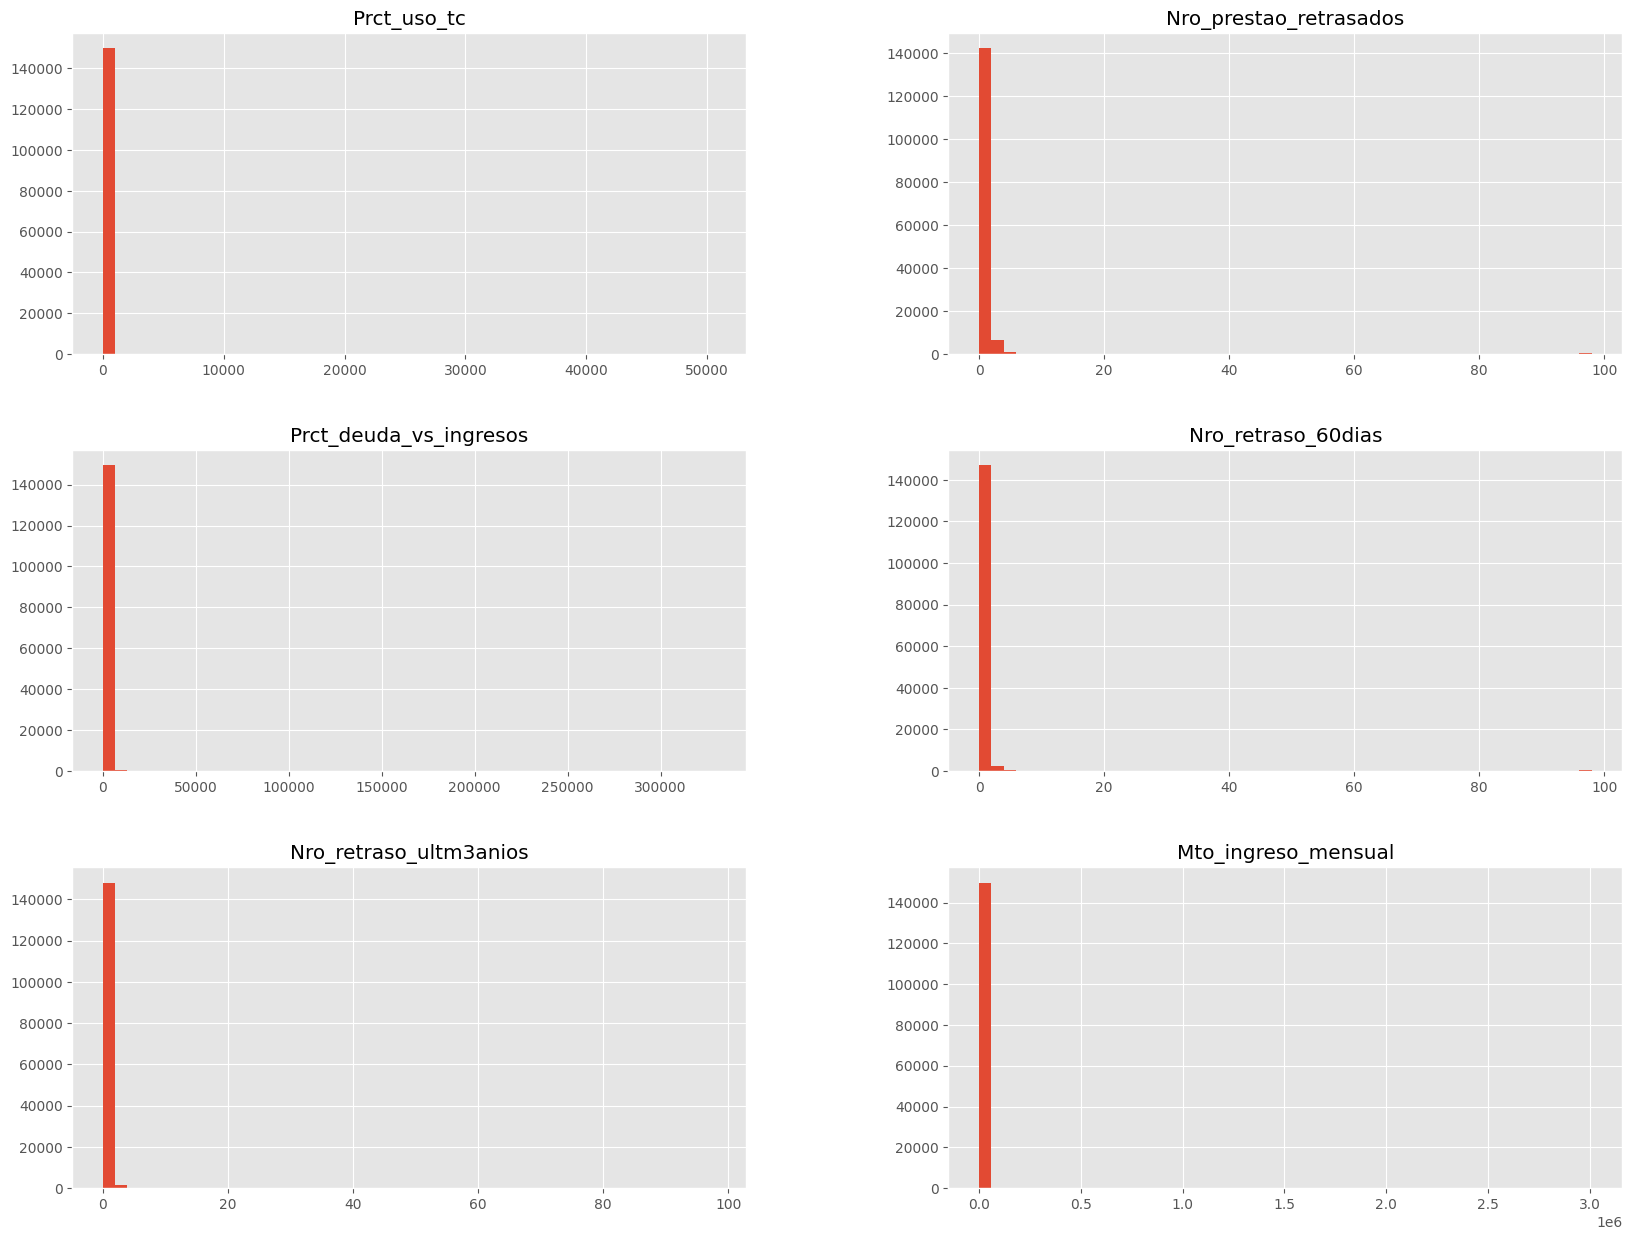

In [25]:
credito[Variables].hist(bins = 50, figsize=(20,15))
plt.show()

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
credito['Mto_ingreso_mensual'].quantile(np.arange(0,1,0.1))

0.0        0.0
0.1        0.0
0.2        0.0
0.3     2358.0
0.4     3400.0
0.5     4357.5
0.6     5400.0
0.7     6613.0
0.8     8250.0
0.9    10750.0
Name: Mto_ingreso_mensual, dtype: float64

In [28]:
credito['Mto_ingreso_mensual'].quantile(np.arange(0.9,1,0.01))

0.90    10750.00
0.91    11105.18
0.92    11666.00
0.93    12120.00
0.94    12744.18
0.95    13500.00
0.96    14600.00
0.97    16000.00
0.98    18000.00
0.99    23000.00
Name: Mto_ingreso_mensual, dtype: float64

<Axes: >

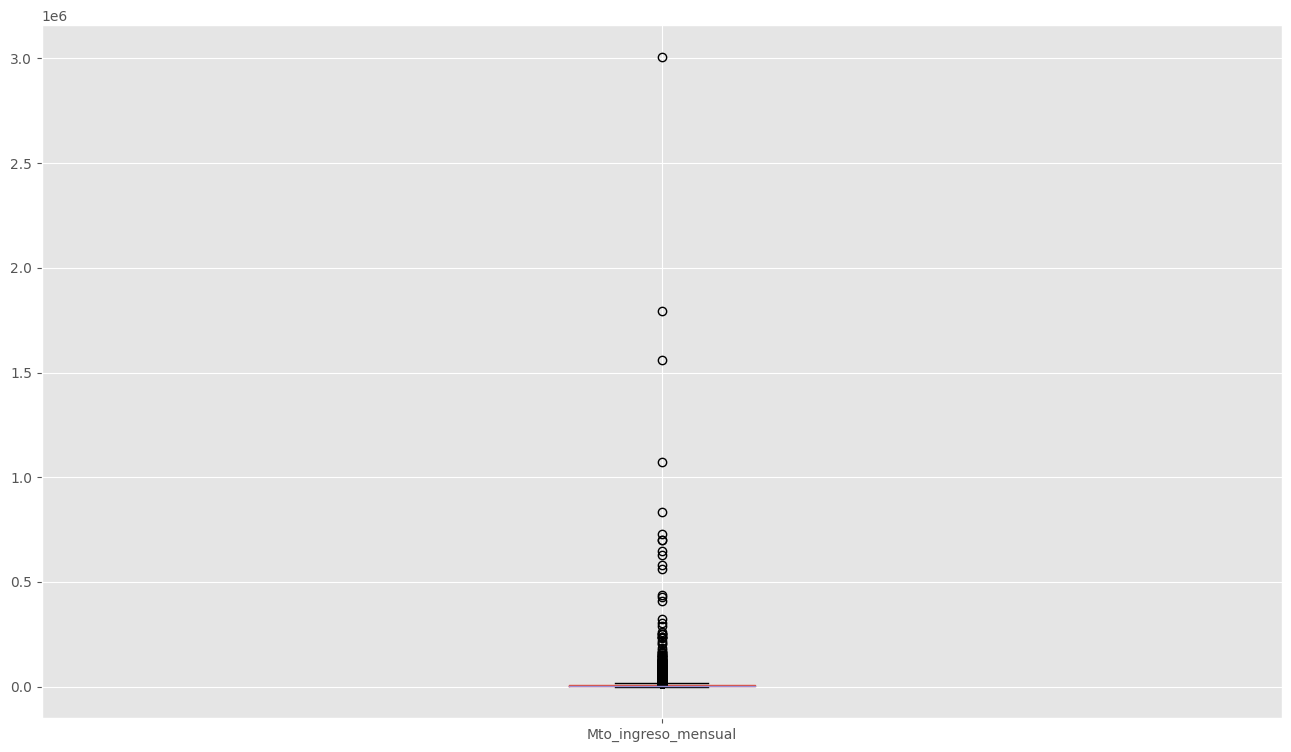

In [29]:
credito.boxplot(['Mto_ingreso_mensual'])

In [30]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))

    return(x)

In [31]:
credito_tratamiento0 = credito[['Mto_ingreso_mensual']].apply(lambda x: outlier_capping(x))

In [32]:
import yfinance

In [33]:
credito = pd.concat([credito.drop(columns=['Mto_ingreso_mensual']), credito_tratamiento0], axis=1,)

<Axes: >

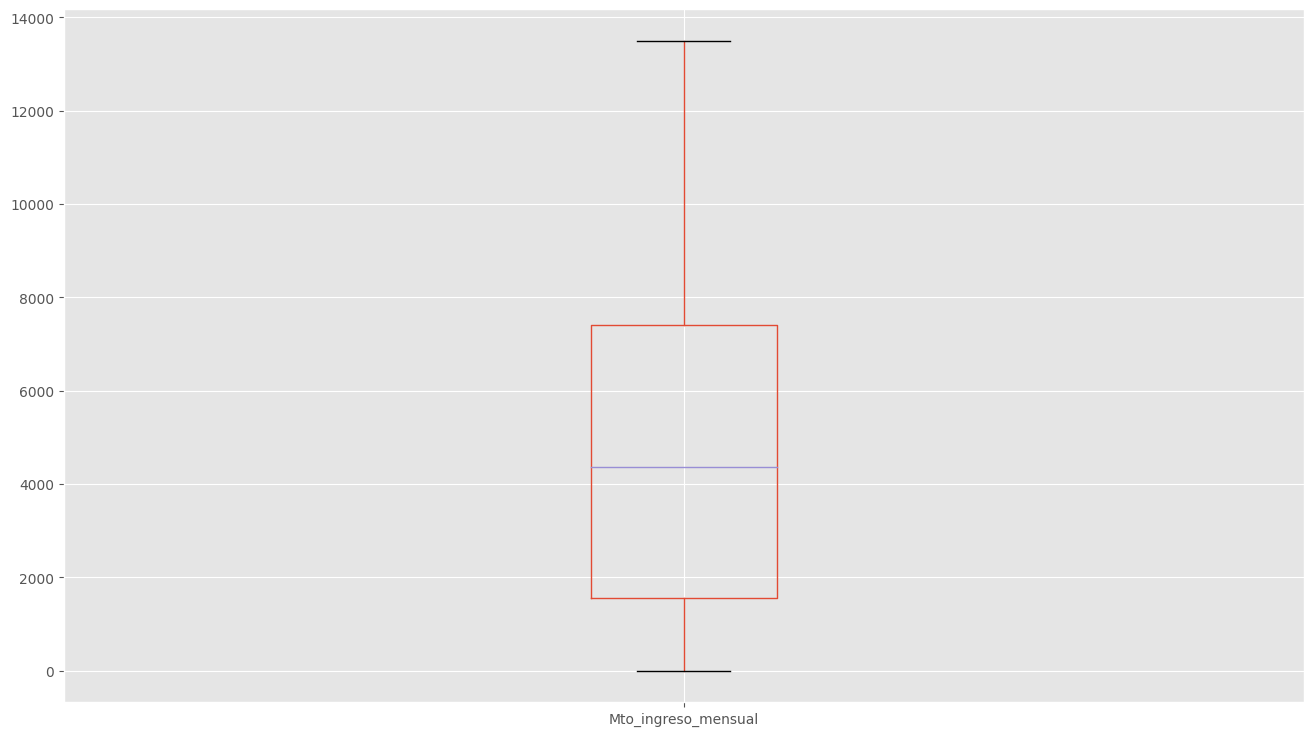

In [34]:
credito.boxplot(['Mto_ingreso_mensual'])

<Axes: >

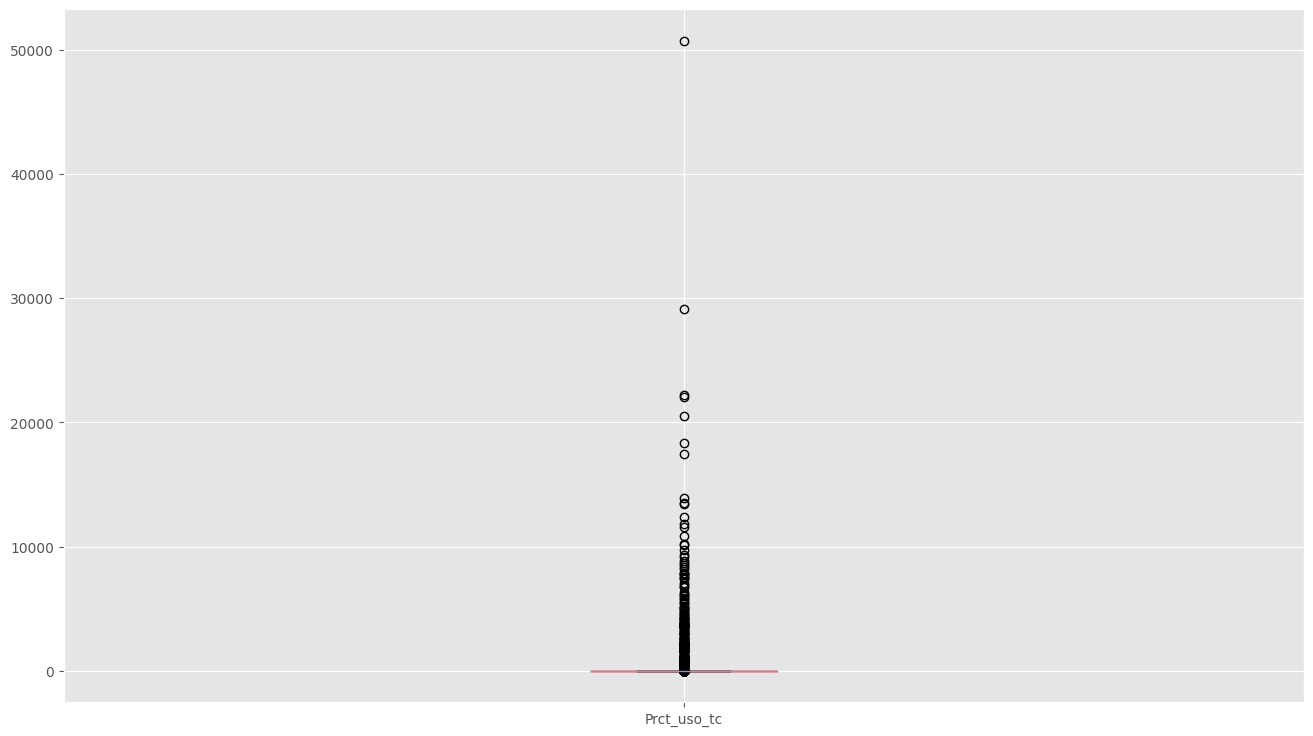

In [35]:
credito.boxplot(['Prct_uso_tc'])

In [36]:
credito_tratamiento1 = credito[['Prct_uso_tc']].apply(lambda x: outlier_capping(x))

In [37]:
credito = pd.concat([credito.drop(columns=['Prct_uso_tc']), credito_tratamiento1], axis=1,)

<Axes: >

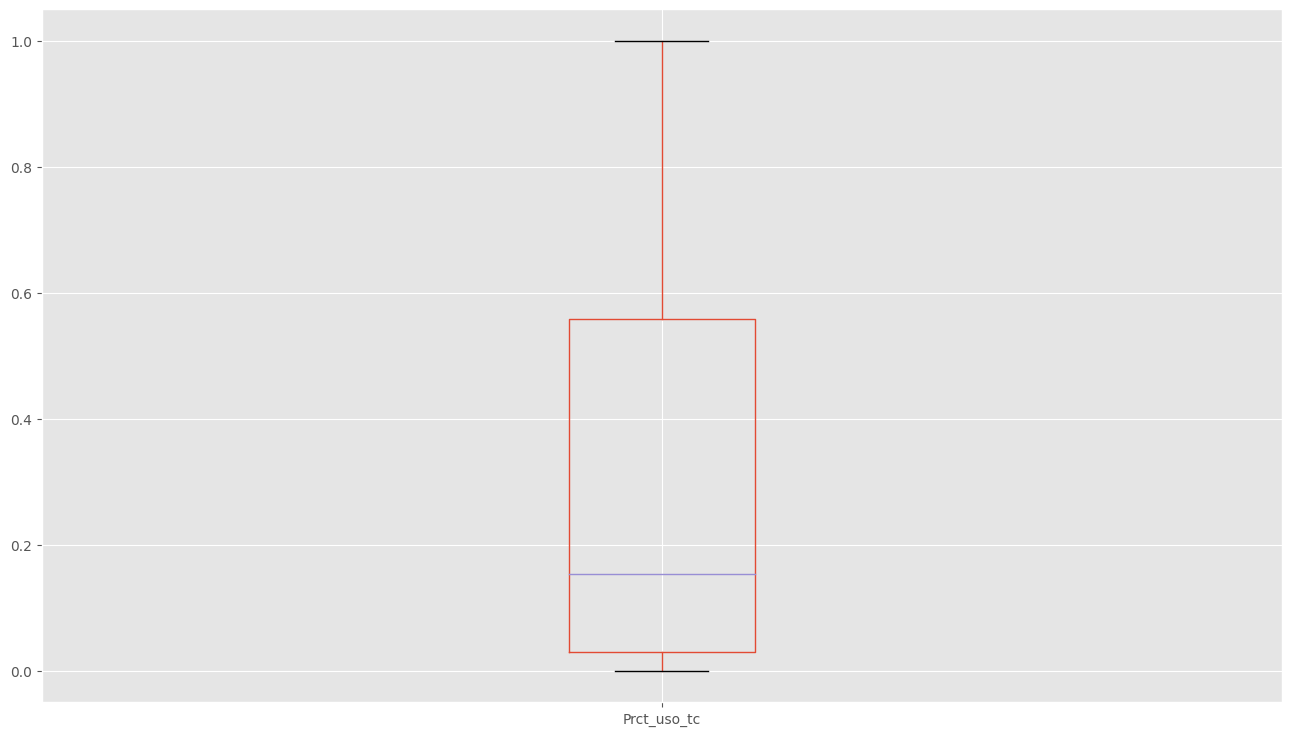

In [38]:
credito.boxplot(['Prct_uso_tc'])

<Axes: >

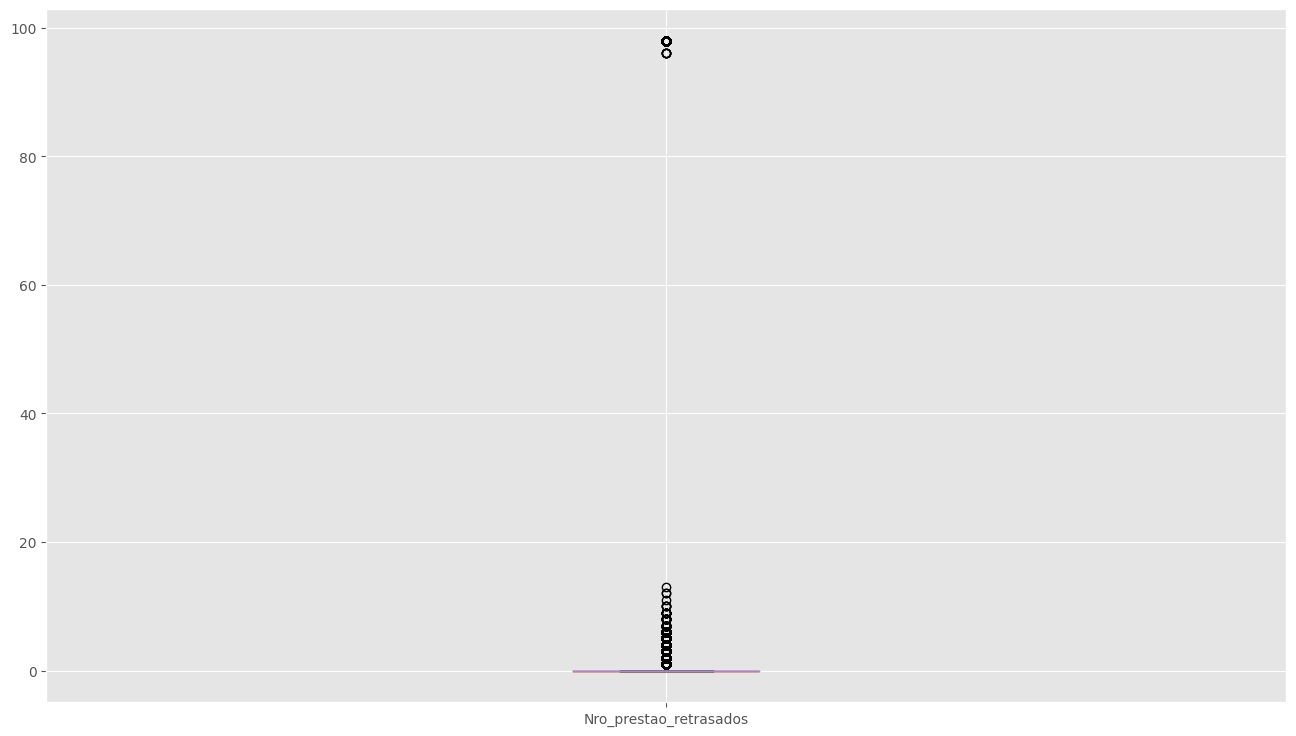

In [39]:
credito.boxplot(['Nro_prestao_retrasados'])

In [40]:
credito_tratamiento2 = credito[['Nro_prestao_retrasados']].apply(lambda x: outlier_capping(x))

In [41]:
credito = pd.concat([credito.drop(columns=['Nro_prestao_retrasados']), credito_tratamiento2], axis=1,)

<Axes: >

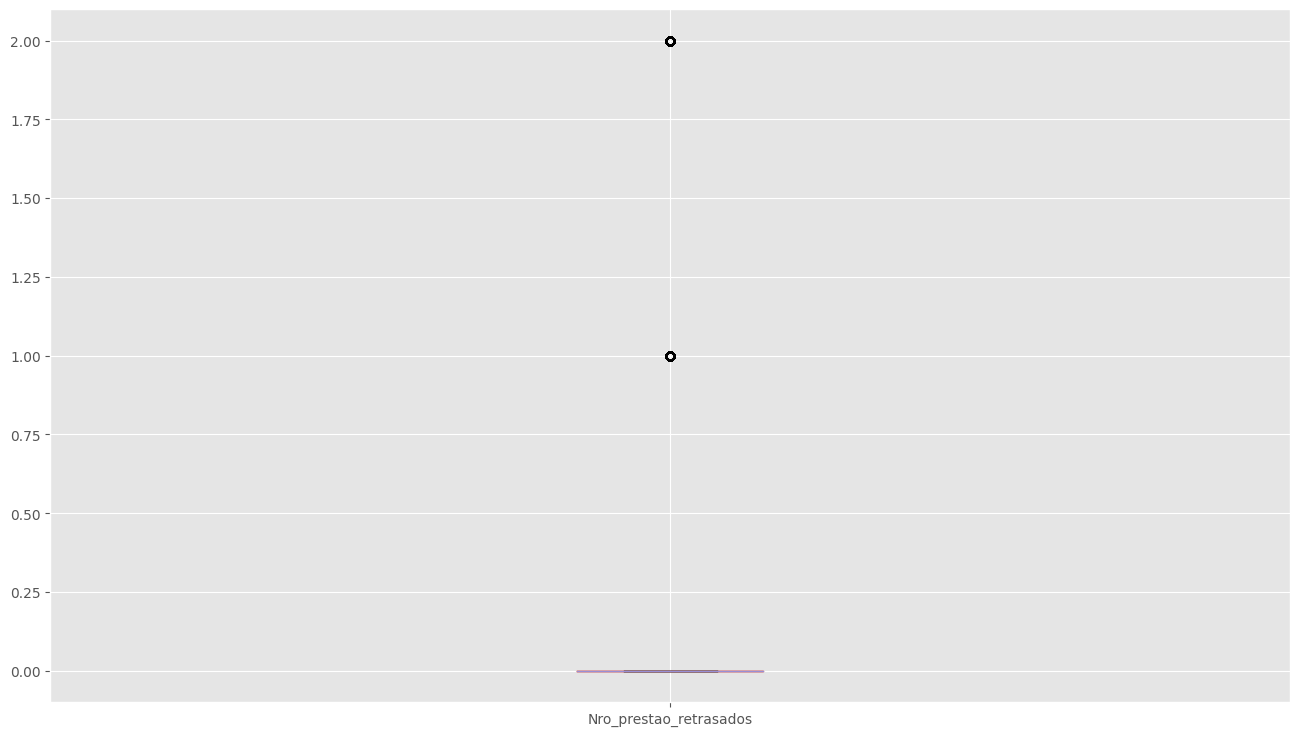

In [42]:
credito.boxplot(['Nro_prestao_retrasados'])

<Axes: >

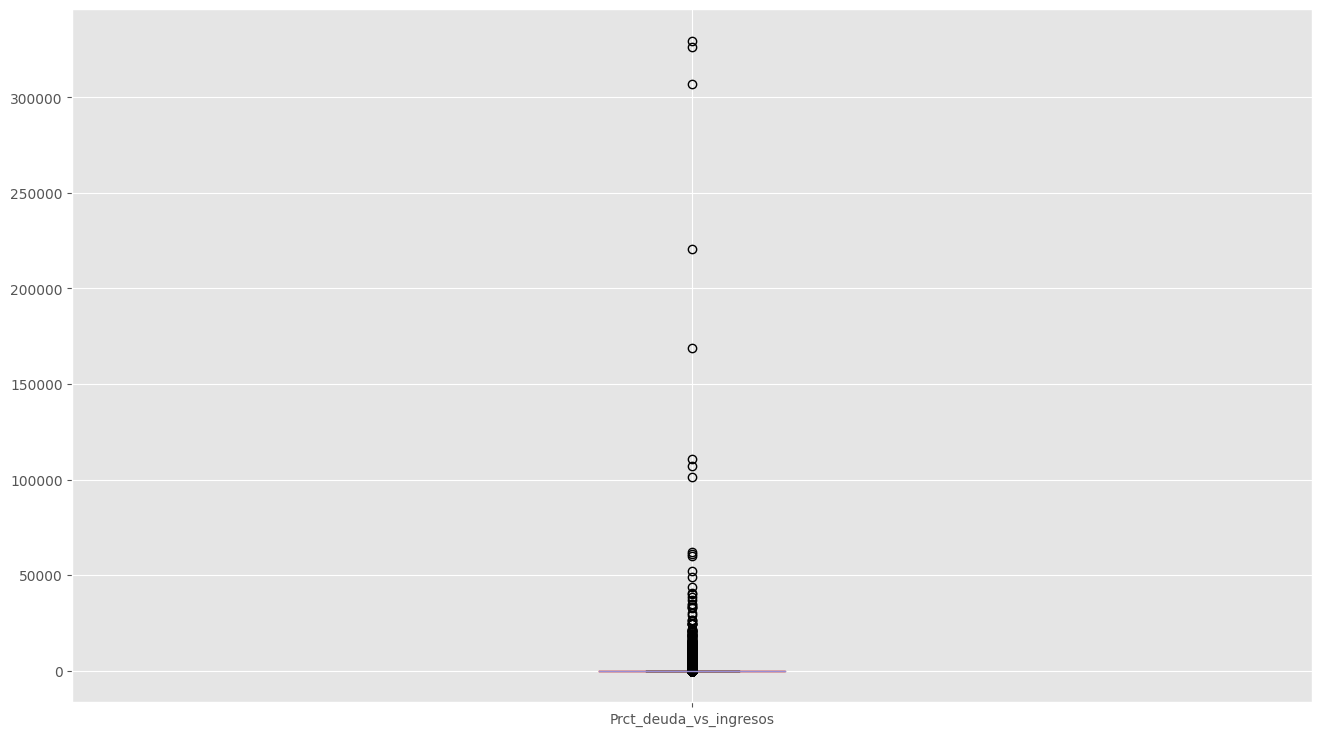

In [43]:
credito.boxplot(['Prct_deuda_vs_ingresos'])

In [44]:
credito_tratamiento3 = credito[['Prct_deuda_vs_ingresos']].apply(lambda x: outlier_capping(x))

In [45]:
credito = pd.concat([credito.drop(columns=['Prct_deuda_vs_ingresos']), credito_tratamiento3], axis=1,)

<Axes: >

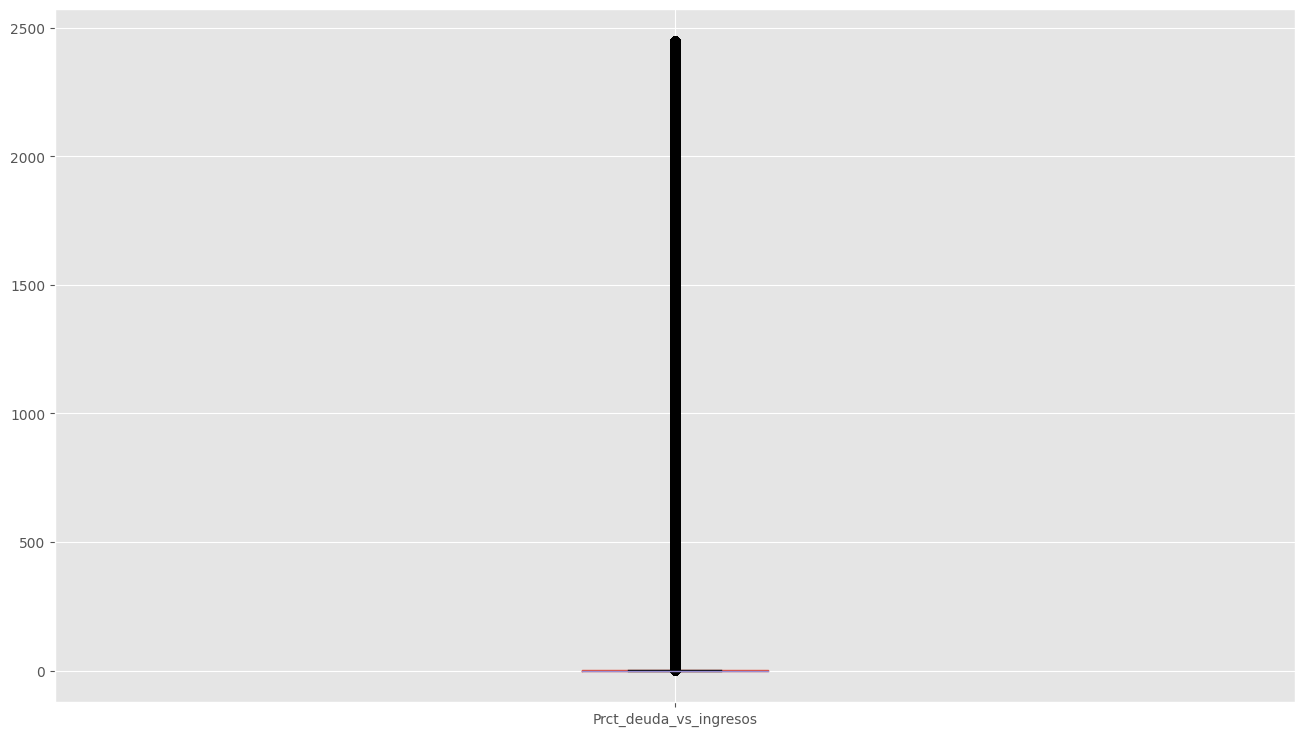

In [46]:
credito.boxplot(['Prct_deuda_vs_ingresos'])

<Axes: >

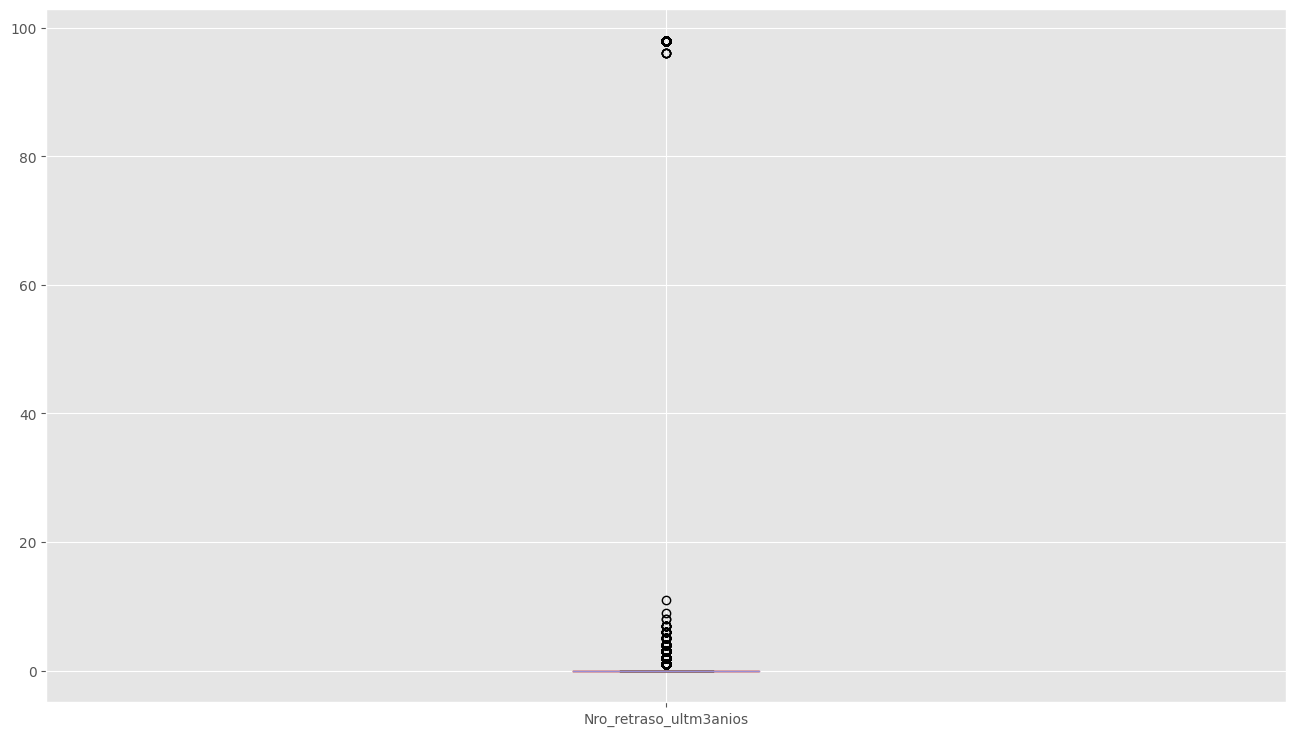

In [47]:
credito.boxplot(['Nro_retraso_ultm3anios'])

In [48]:
credito_tratamiento4 = credito[['Nro_retraso_ultm3anios']].apply(lambda x: outlier_capping(x))

In [49]:
credito = pd.concat([credito.drop(columns=['Nro_retraso_ultm3anios']), credito_tratamiento4], axis=1,)

<Axes: >

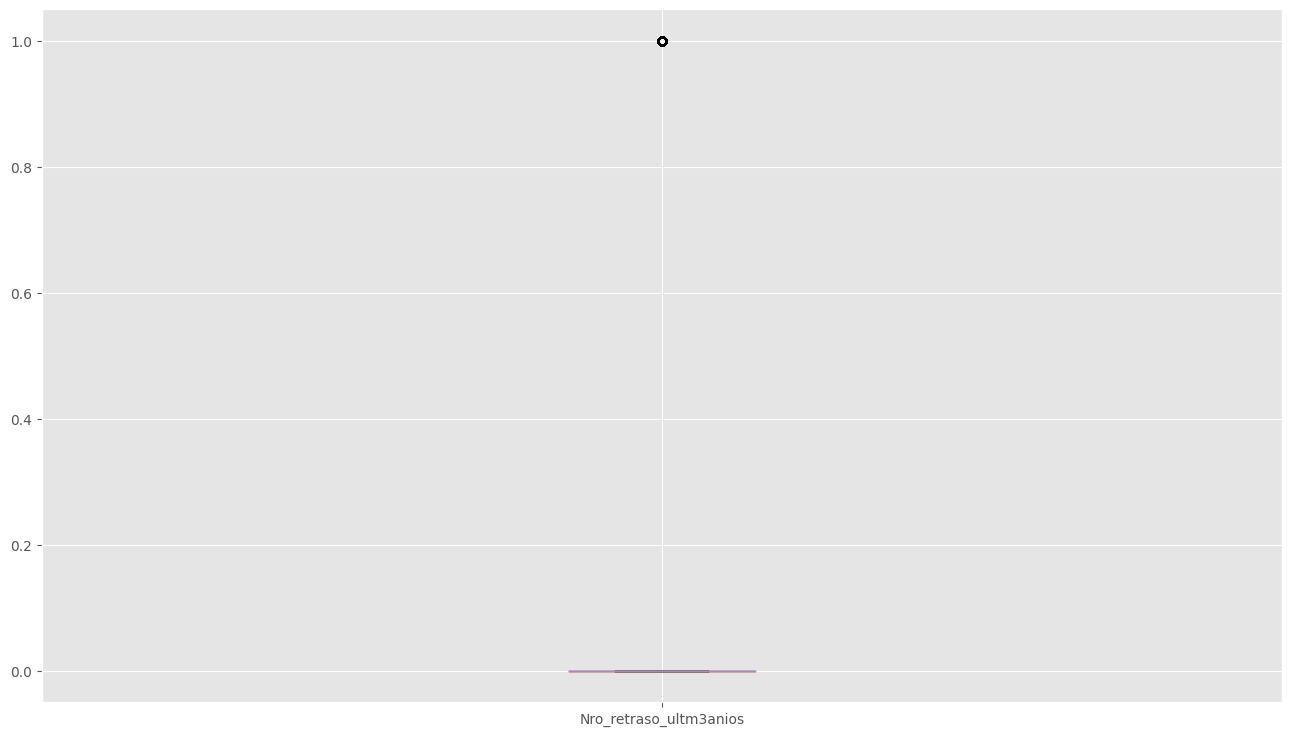

In [50]:
credito.boxplot(['Nro_retraso_ultm3anios'])

<Axes: >

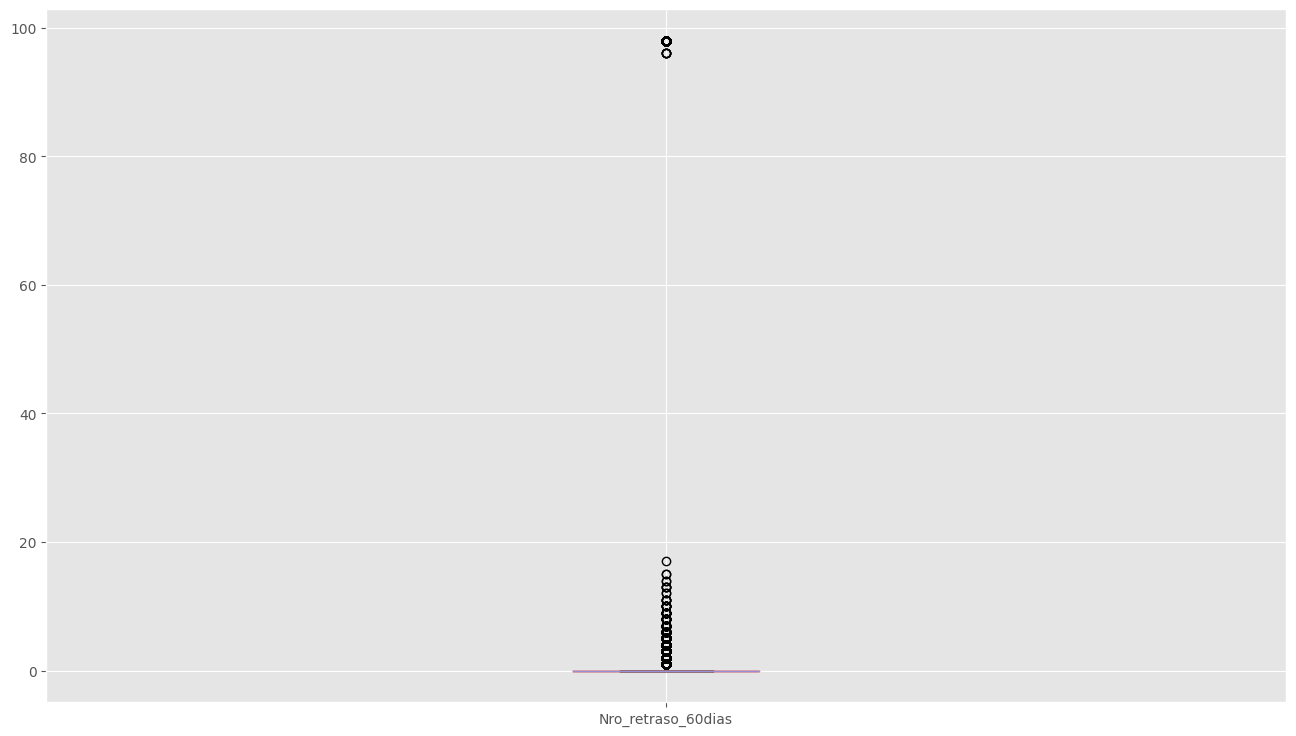

In [51]:
credito.boxplot(['Nro_retraso_60dias'])

In [52]:
credito_tratamiento5 = credito[['Nro_retraso_60dias']].apply(lambda x: outlier_capping(x))

In [53]:
credito = pd.concat([credito.drop(columns=['Nro_retraso_60dias']), credito_tratamiento5], axis=1,)

<Axes: >

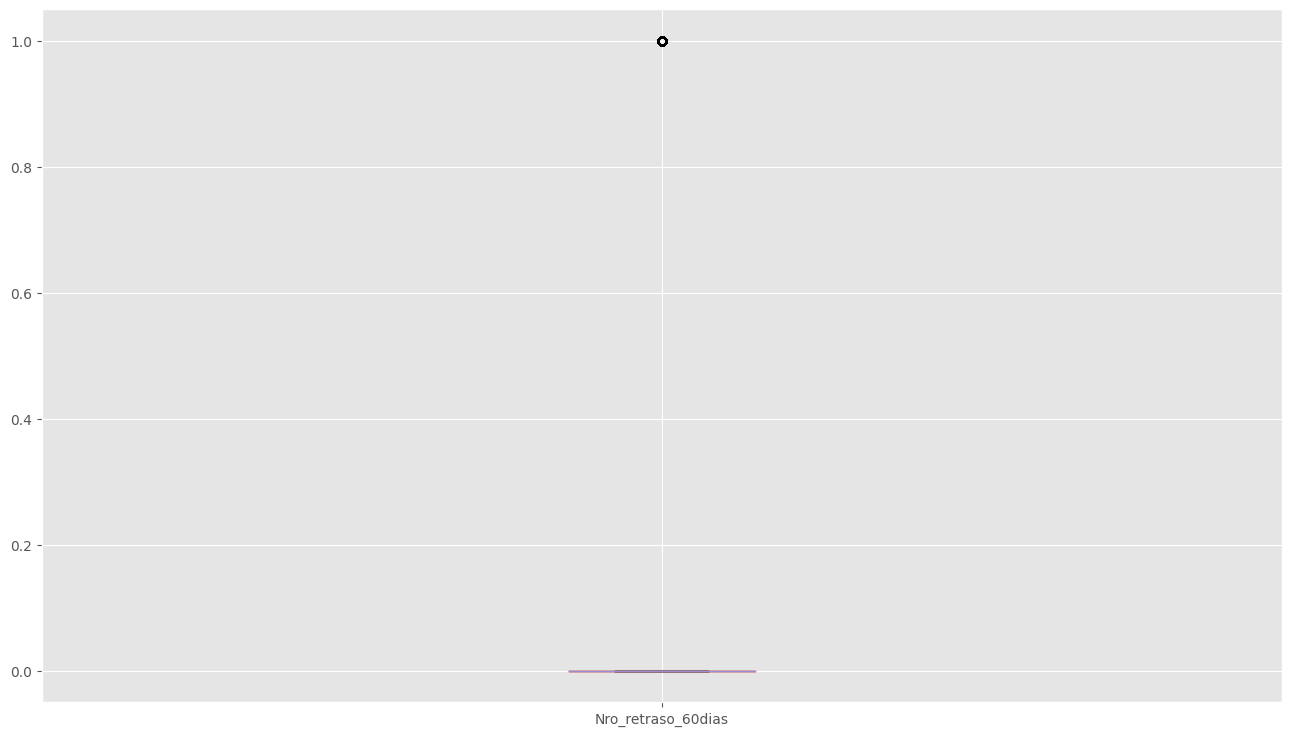

In [54]:
credito.boxplot(['Nro_retraso_60dias'])

<Axes: >

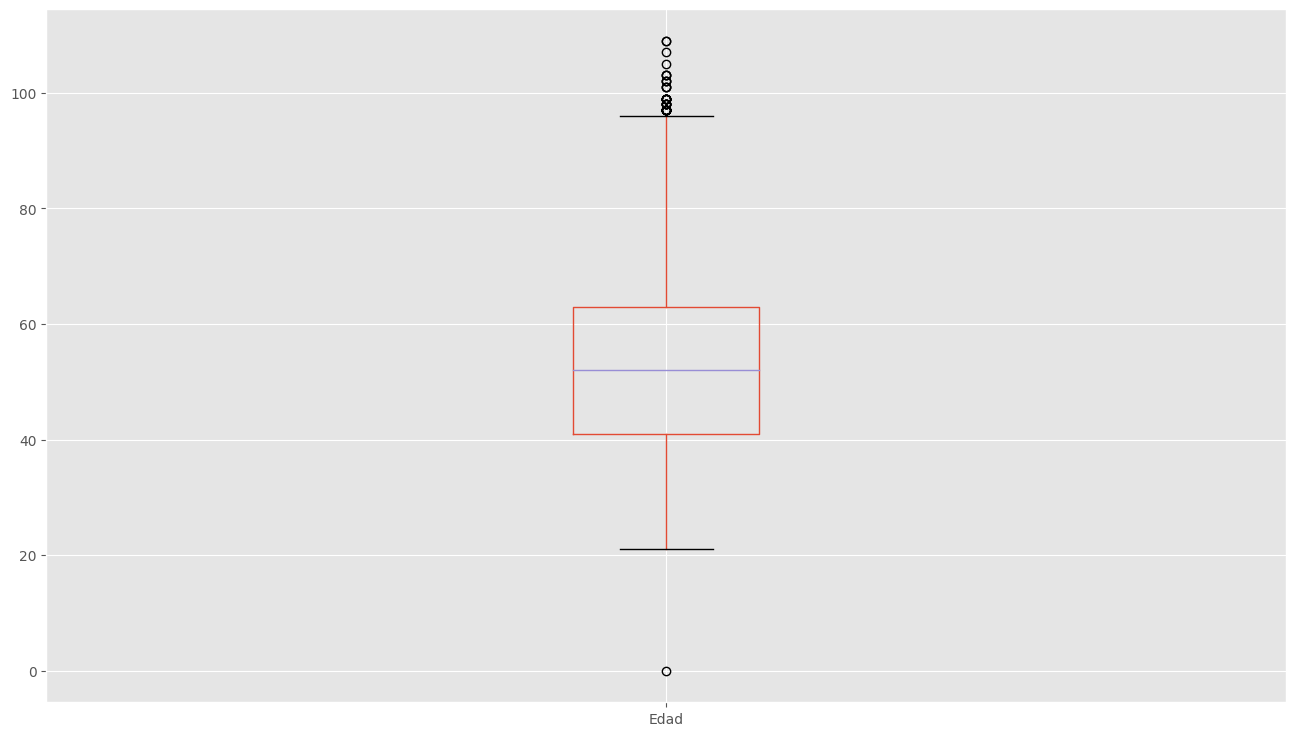

In [55]:
credito.boxplot(['Edad'])

In [56]:
credito_tratamiento6 = credito[['Edad']].apply(lambda x: outlier_capping(x))

In [57]:
credito = pd.concat([credito.drop(columns=['Edad']), credito_tratamiento6], axis=1,)

<Axes: >

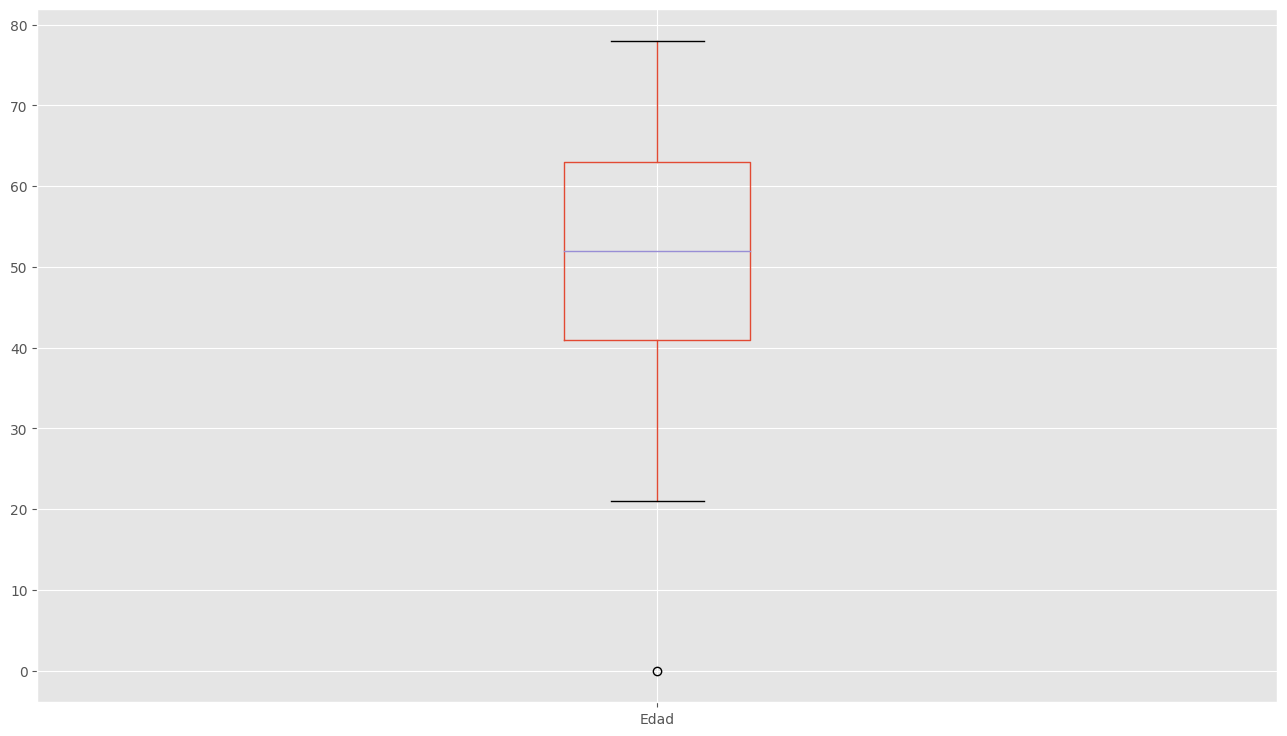

In [58]:
credito.boxplot(['Edad'])

In [59]:
VariablesNEW= ['Prct_uso_tc','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Nro_retraso_60dias','Nro_retraso_ultm3anios','Mto_ingreso_mensual','Edad']

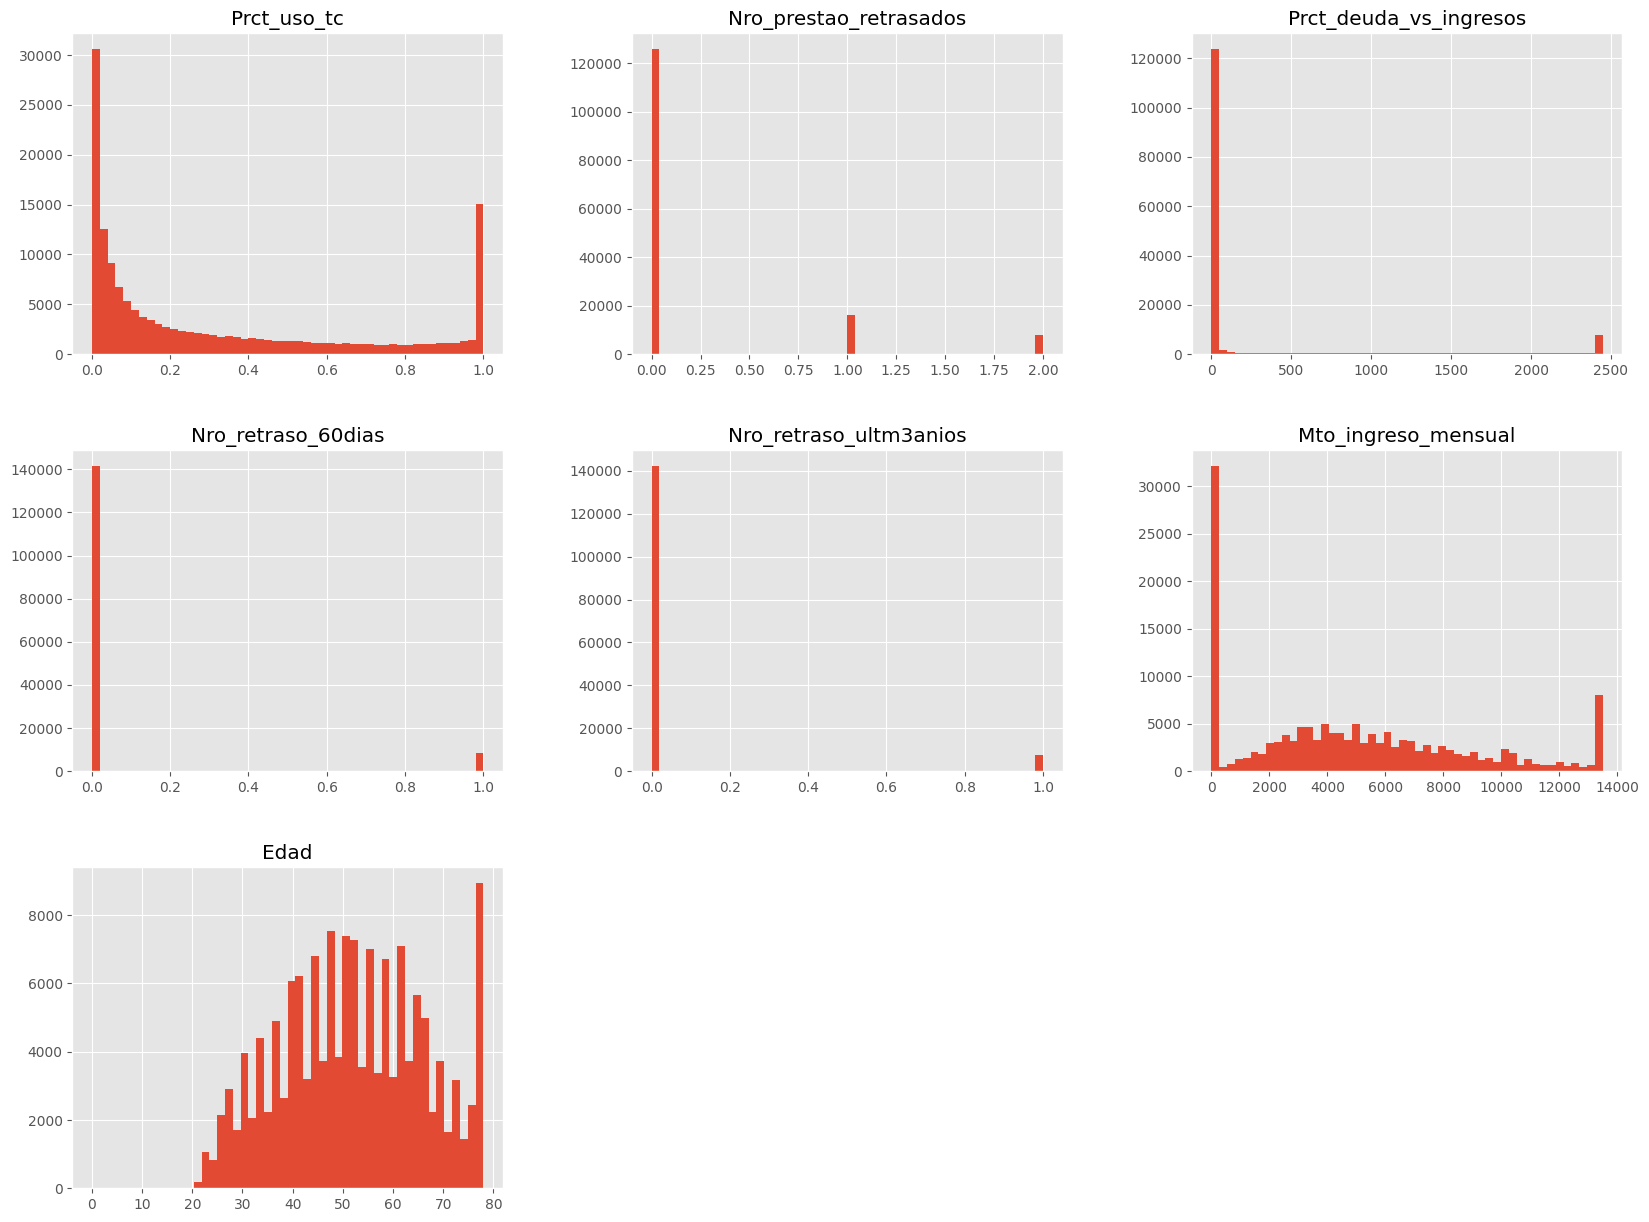

In [60]:
credito[VariablesNEW].hist(bins = 50, figsize=(20,15))
plt.show()

array([[<Axes: title={'center': 'Prct_uso_tc'}>,
        <Axes: title={'center': 'Nro_prestao_retrasados'}>,
        <Axes: title={'center': 'Prct_deuda_vs_ingresos'}>],
       [<Axes: title={'center': 'Nro_retraso_60dias'}>,
        <Axes: title={'center': 'Nro_retraso_ultm3anios'}>,
        <Axes: title={'center': 'Mto_ingreso_mensual'}>],
       [<Axes: title={'center': 'Edad'}>, <Axes: >, <Axes: >]],
      dtype=object)

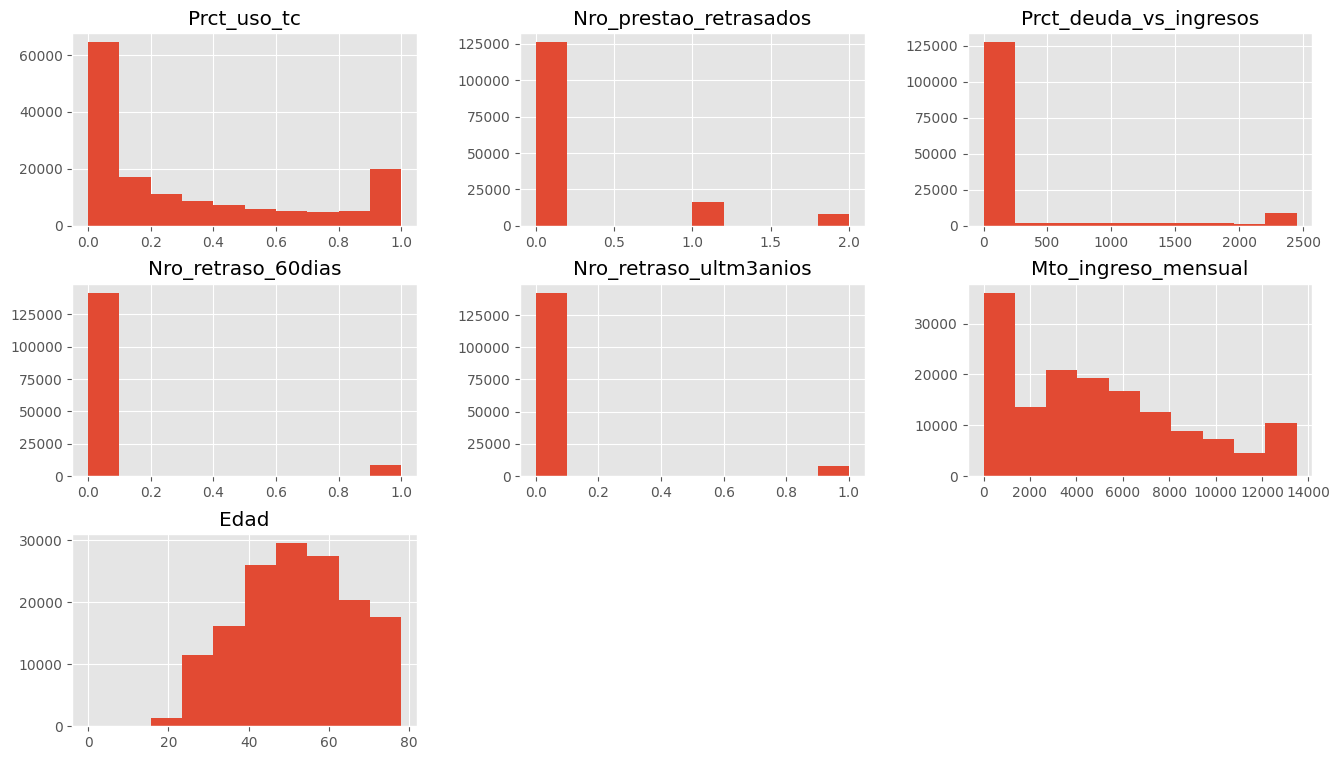

In [61]:
credito.hist(['Prct_uso_tc','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Nro_retraso_60dias','Nro_retraso_ultm3anios','Mto_ingreso_mensual','Edad'])

In [62]:
age_avg = credito['Edad'].mean()
age_std = credito['Edad'].std()
age_null_count = credito['Edad'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

conValoresNulos = np.isnan(credito['Edad'])

credito.loc[np.isnan(credito['Edad']), 'Edad'] = age_null_random_list
credito['Edad'] = credito['Edad'].astype(int)

print("Edad Promedio: " + str(age_avg))
print("Desvió Std Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))

Edad Promedio: 52.03593333333333
Desvió Std Edad: 14.231918321583224
Intervalo para asignar edad aleatoria: 37 a 66


In [63]:
credito.loc[(credito['Edad'] > 20) & (credito['Edad'] <= 30), 'edad_Encoded'] = 1
credito.loc[(credito['Edad'] > 30) & (credito['Edad'] <= 40), 'edad_Encoded'] = 2
credito.loc[(credito['Edad'] > 40) & (credito['Edad'] <= 50), 'edad_Encoded'] = 3
credito.loc[ credito['Edad'] > 50, 'edad_Encoded'] = 4

In [64]:
age_avg = credito['Mto_ingreso_mensual'].mean()
age_std = credito['Mto_ingreso_mensual'].std()
age_null_count = credito['Mto_ingreso_mensual'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

conValoresNulos = np.isnan(credito['Mto_ingreso_mensual'])

credito.loc[np.isnan(credito['Mto_ingreso_mensual']), 'Mto_ingreso_mensual'] = age_null_random_list
credito['Mto_ingreso_mensual'] = credito['Mto_ingreso_mensual'].astype(int)

print("Ingreso Promedio: " + str(age_avg))
print("Desvió Std Ingreso: " + str(age_std))
print("Intervalo para asignar ingreso aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))

Ingreso Promedio: 4854.322426666667
Desvió Std Ingreso: 3963.219285237074
Intervalo para asignar ingreso aleatoria: 891 a 8817


In [65]:
credito.loc[ credito['Mto_ingreso_mensual'] <= 891, 'Mto_ingreso_mensual_encoded'] 					       = 0
credito.loc[(credito['Mto_ingreso_mensual'] > 2000) & (credito['Mto_ingreso_mensual'] <= 4000), 'Mto_ingreso_mensual_encoded'] = 1
credito.loc[(credito['Mto_ingreso_mensual'] > 4000) & (credito['Mto_ingreso_mensual'] <= 6000), 'Mto_ingreso_mensual_encoded'] = 2
credito.loc[(credito['Mto_ingreso_mensual'] > 6000) & (credito['Mto_ingreso_mensual'] <= 8817), 'Mto_ingreso_mensual_encoded'] = 3
credito.loc[ credito['Mto_ingreso_mensual'] > 8817, 'edadEncoded'] = 4

In [66]:
drop_elements = ['Edad','Mto_ingreso_mensual',]
cred_encoded = credito.drop(drop_elements, axis = 1)

In [67]:
cred_encoded.head()

,ID,Default,Nro_prod_financieros_deuda,Nro_creditos_hipotecarios,Nro_dependiente,Prct_uso_tc,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Nro_retraso_ultm3anios,Nro_retraso_60dias,edad_Encoded,Mto_ingreso_mensual_encoded,edadEncoded
0,1,1,13,6,2.0,0.766127,2,0.802982,0,0,3.0,NaN,4.0
1,2,0,4,0,1.0,0.957151,0,0.121876,0,0,2.0,1.0,NaN
2,3,0,2,0,0.0,0.658180,1,0.085113,0,1,2.0,1.0,NaN
3,4,0,5,0,0.0,0.233810,0,0.036050,0,0,1.0,1.0,NaN
4,5,0,7,1,0.0,0.907239,1,0.024926,0,0,3.0,NaN,4.0


<bound method Series.sort_index of 4.0    79866
3.0    35037
2.0    24339
1.0    10757
Name: edad_Encoded, dtype: int64>

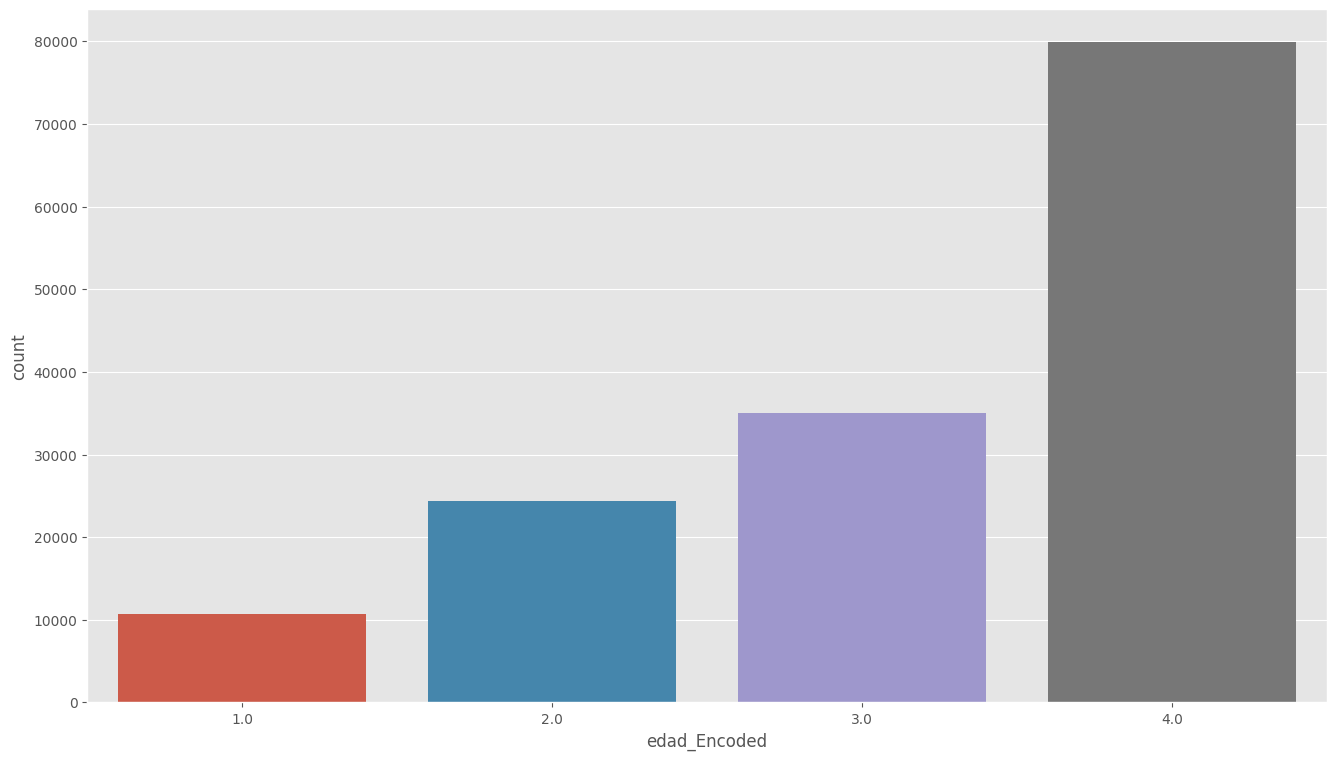

In [68]:
sns.countplot(data = credito, x = "edad_Encoded")
credito['edad_Encoded'].value_counts().sort_index

<bound method Series.sort_index of 0.0    33809
2.0    28676
1.0    28395
3.0    25275
Name: Mto_ingreso_mensual_encoded, dtype: int64>

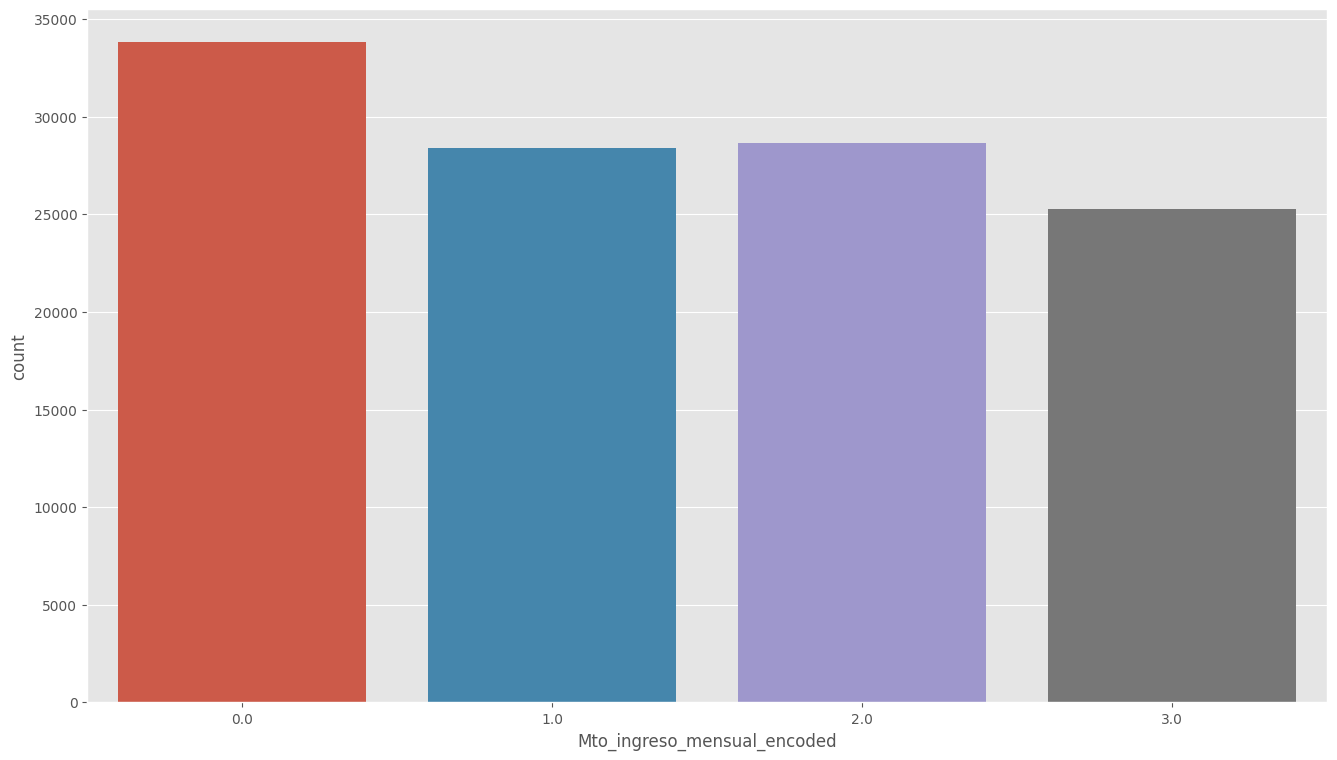

In [69]:
sns.countplot(data = credito, x = "Mto_ingreso_mensual_encoded")
credito['Mto_ingreso_mensual_encoded'].value_counts().sort_index

<Axes: xlabel='Nro_dependiente', ylabel='count'>

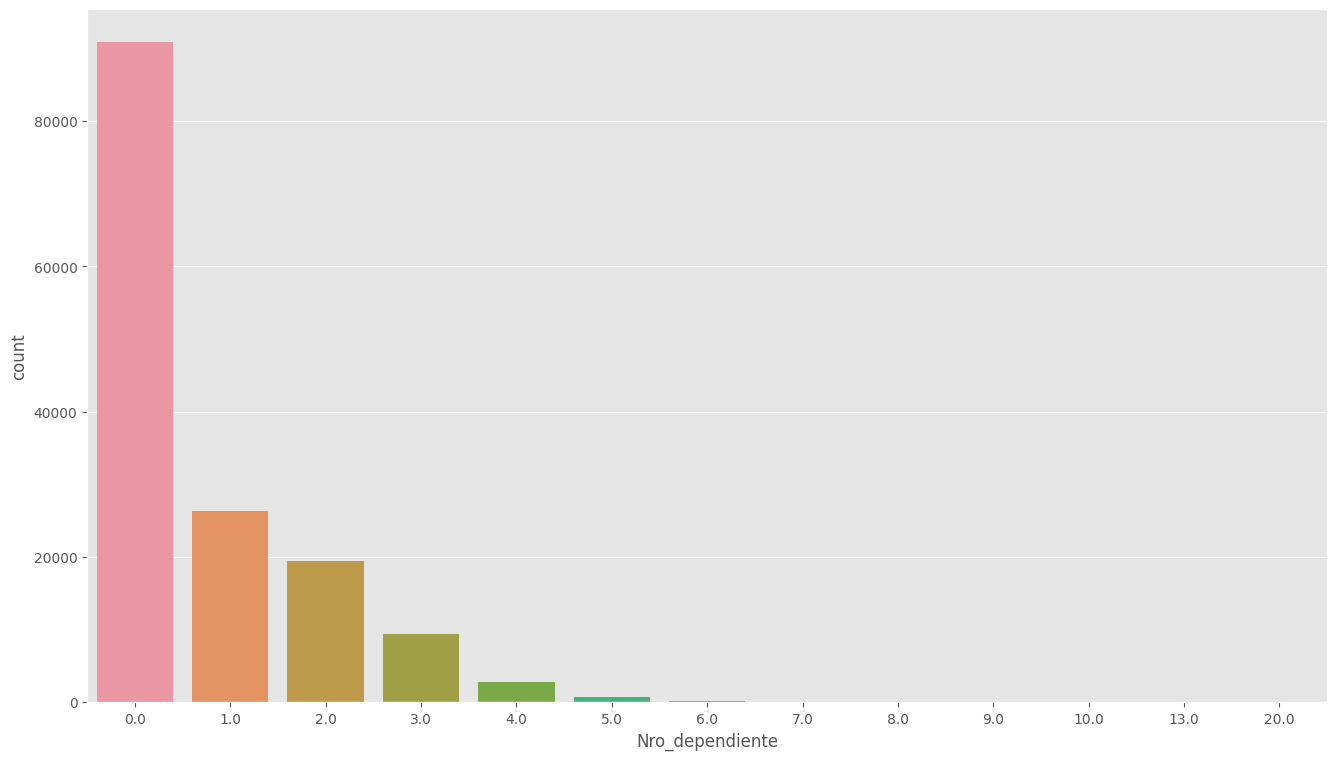

In [70]:
sns.countplot(data = credito, x = "Nro_dependiente")

In [71]:
credito.describe()

,ID,Default,Nro_prod_financieros_deuda,Nro_creditos_hipotecarios,Nro_dependiente,Mto_ingreso_mensual,Prct_uso_tc,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Nro_retraso_ultm3anios,Nro_retraso_60dias,Edad,edad_Encoded,Mto_ingreso_mensual_encoded,edadEncoded
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,149999.000000,116155.000000,25920.0
mean,75000.500000,0.066840,8.452760,1.018240,0.737413,4854.322427,0.319196,0.212873,254.635916,0.050693,0.055587,52.035933,3.226755,1.391003,4.0
std,43301.414527,0.249746,5.145951,1.129771,1.107021,3963.219285,0.349481,0.523017,662.435683,0.219371,0.229123,14.231918,0.964442,1.120473,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.0
25%,37500.750000,0.000000,5.000000,0.000000,0.000000,1550.000000,0.029867,0.000000,0.175074,0.000000,0.000000,41.000000,3.000000,0.000000,4.0
50%,75000.500000,0.000000,8.000000,1.000000,0.000000,4357.500000,0.154181,0.000000,0.366508,0.000000,0.000000,52.000000,4.000000,1.000000,4.0
75%,112500.250000,0.000000,11.000000,2.000000,1.000000,7400.000000,0.559046,0.000000,0.868254,0.000000,0.000000,63.000000,4.000000,2.000000,4.0
max,150000.000000,1.000000,58.000000,54.000000,20.000000,13500.000000,1.000000,2.000000,2449.000000,1.000000,1.000000,78.000000,4.000000,3.000000,4.0


<Axes: >

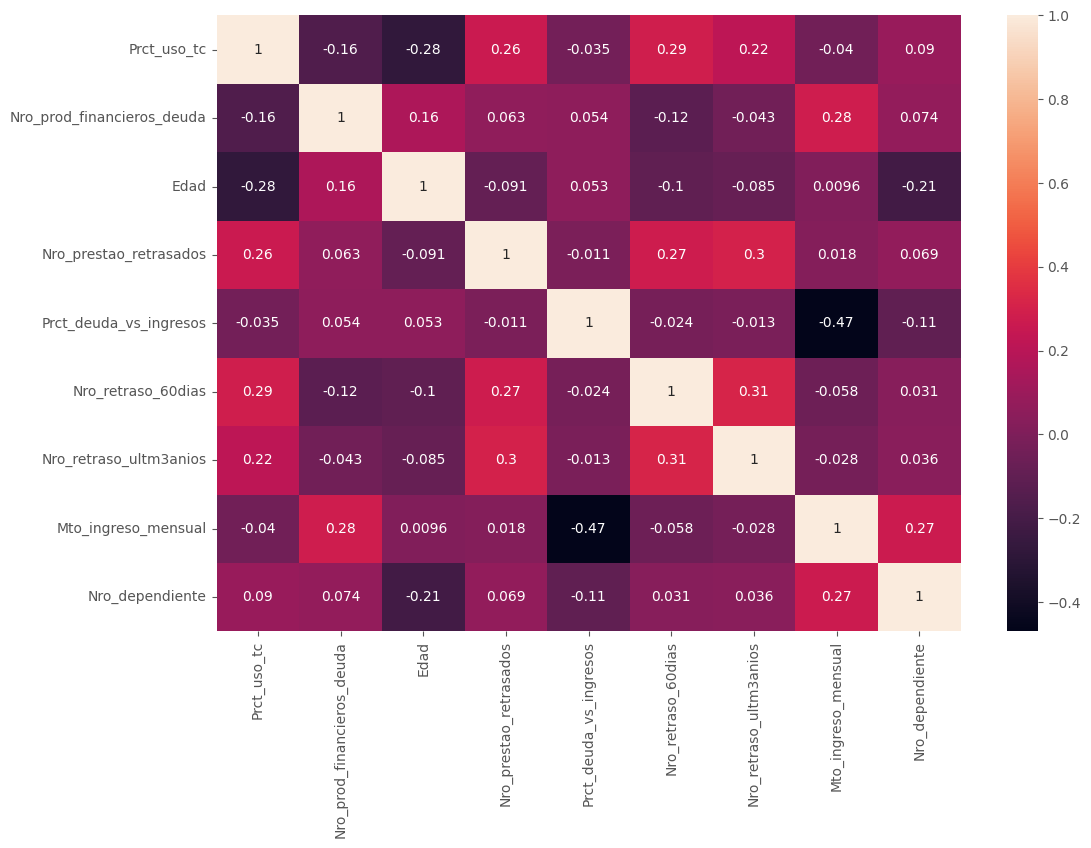

In [72]:
corr=credito[['Prct_uso_tc','Nro_prod_financieros_deuda','Edad','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Nro_retraso_60dias','Nro_retraso_ultm3anios','Mto_ingreso_mensual','Nro_dependiente']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

*Los valores de r positivos indican una correlación positiva, en la que los valores de ambas variables tienden a incrementarse juntos. Los valores de r negativos indican una correlación negativa, en la que los valores de una variable tienden a incrementarse mientras que los valores de la otra variable descienden.*

<Axes: xlabel='edad_Encoded', ylabel='count'>

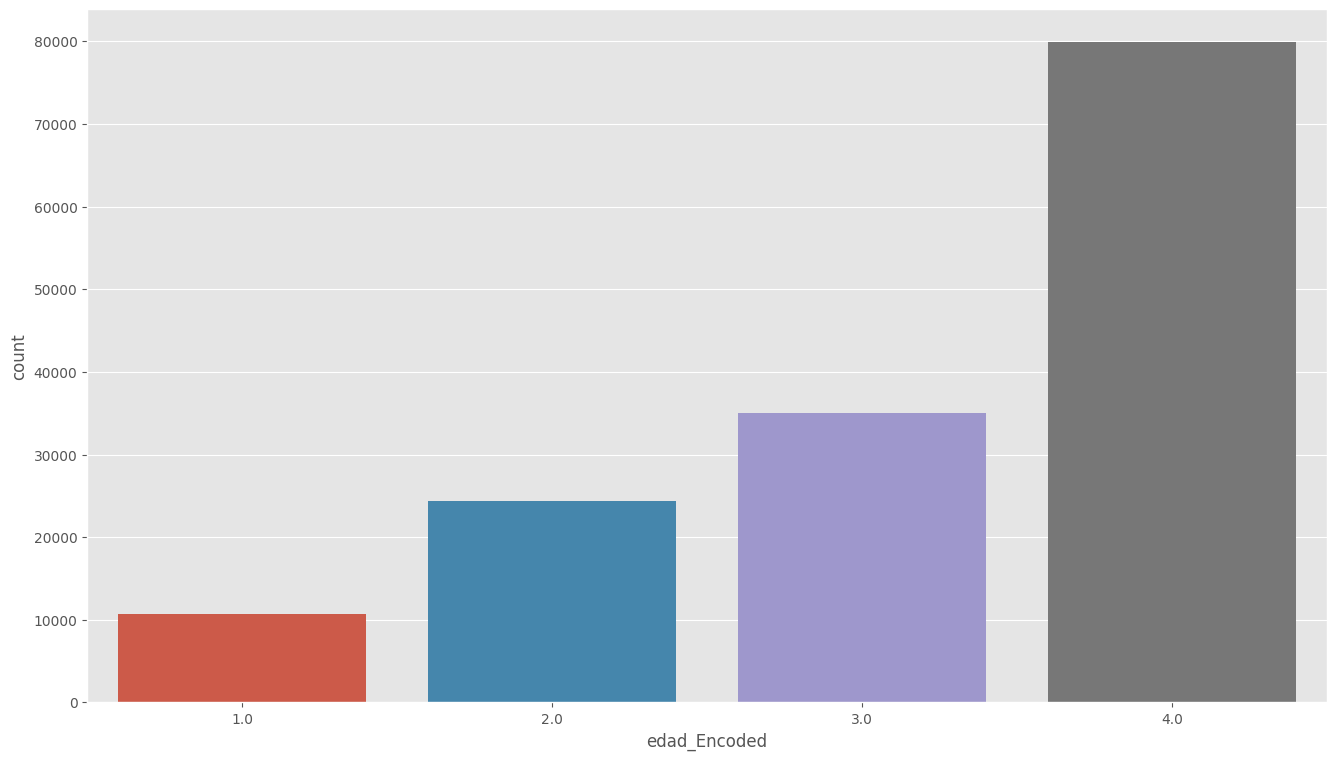

In [73]:
sns.countplot(data = credito, x = "edad_Encoded")

In [74]:
credito[['edad_Encoded','Nro_prod_financieros_deuda']].groupby(['edad_Encoded'], as_index=False).agg(['count','sum','mean'])

Nro_prod_financieros_deuda                  
                                  count     sum      mean
edad_Encoded                                             
1.0                               10757   50633  4.706982
2.0                               24339  180139  7.401249
3.0                               35037  303146  8.652168
4.0                               79866  733990  9.190269

<Axes: xlabel='Nro_retraso_60dias', ylabel='count'>

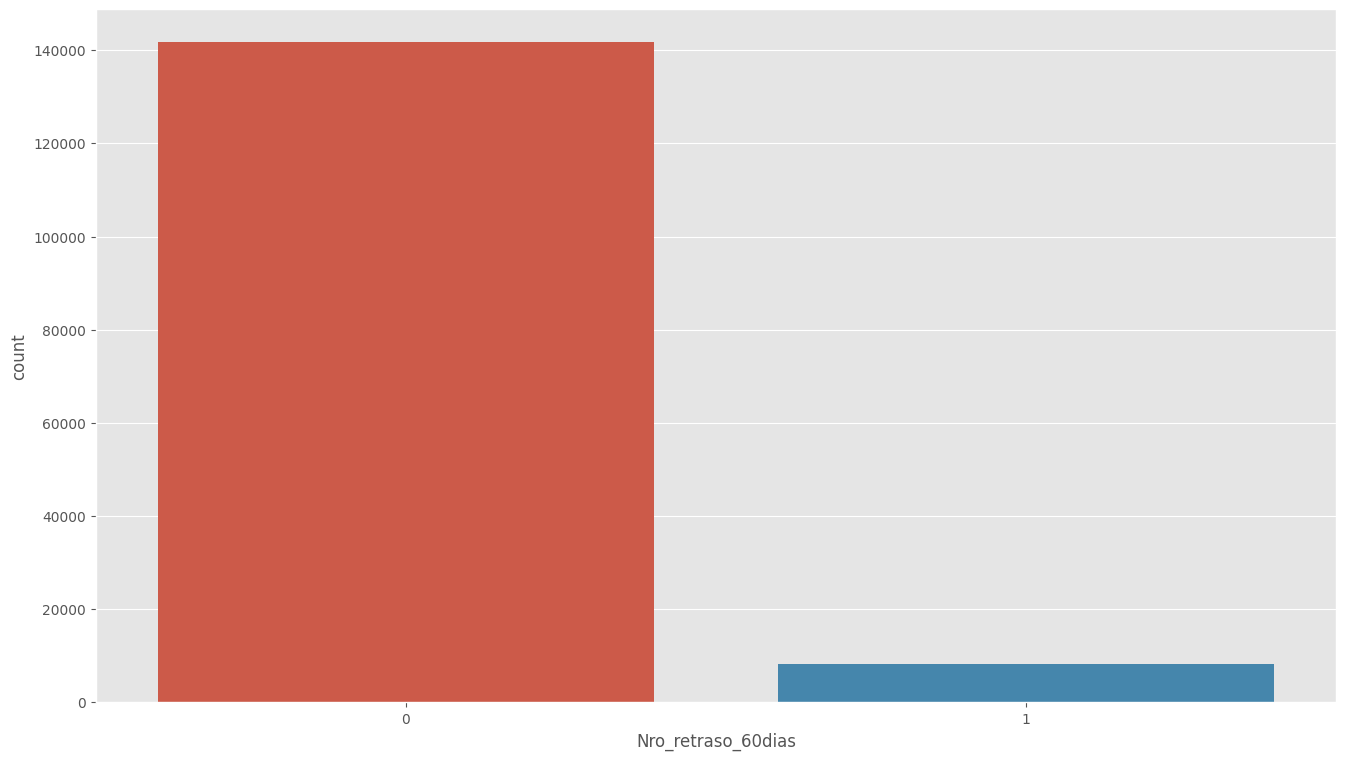

In [75]:
sns.countplot(data = credito, x = "Nro_retraso_60dias")

In [76]:
credito[['edad_Encoded','Mto_ingreso_mensual_encoded']].groupby(['edad_Encoded'], as_index=False).agg(['count','sum','mean'])

Mto_ingreso_mensual_encoded                   
                                   count      sum      mean
edad_Encoded                                               
1.0                                 8679   8610.0  0.992050
2.0                                20134  30862.0  1.532830
3.0                                26329  41936.0  1.592768
4.0                                61012  80162.0  1.313873

In [77]:
credito[['edad_Encoded', 'Default']].groupby(['edad_Encoded'], as_index=False).agg(['count','sum','mean'])

Default                
               count   sum      mean
edad_Encoded                        
1.0            10757  1244  0.115646
2.0            24339  2390  0.098196
3.0            35037  2893  0.082570
4.0            79866  3499  0.043811

In [78]:
credito[['edad_Encoded','Mto_ingreso_mensual']].groupby(['edad_Encoded'], as_index=False).agg(['count','sum','mean'])

Mto_ingreso_mensual                        
                           count        sum         mean
edad_Encoded                                            
1.0                        10757   28525498  2651.807939
2.0                        24339  113848655  4677.622540
3.0                        35037  195425239  5577.681851
4.0                        79866  390342972  4887.473668

In [79]:
credito[['Nro_dependiente','Mto_ingreso_mensual_encoded']].groupby(['Nro_dependiente'], as_index=False).agg(['count','sum','mean'])

Mto_ingreso_mensual_encoded                   
                                      count      sum      mean
Nro_dependiente                                               
0.0                                   74143  85926.0  1.158923
1.0                                   19314  34445.0  1.783421
2.0                                   13821  24940.0  1.804500
3.0                                    6454  11754.0  1.821196
4.0                                    1819   3382.0  1.859263
5.0                                     455    831.0  1.826374
6.0                                      99    199.0  2.010101
7.0                                      30     58.0  1.933333
8.0                                      12     26.0  2.166667
9.0                                       3      2.0  0.666667
10.0                                      3      5.0  1.666667
13.0                                      1      1.0  1.000000
20.0                                      1      3.0  3.000000

# Evaluación de resultados de las estrategias de muestreo - RESULTADO: Oversampling


In [80]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Sección nueva

In [81]:
credito.groupby('Default').size()

Default
0    139974
1     10026
dtype: int64

In [82]:
credito.shape

(150000, 15)

In [83]:
credito.groupby('Default').size()

Default
0    139974
1     10026
dtype: int64

Class 0 N90: 139974
Class 1 M90: 10026
Proporción: 13.96 : 1


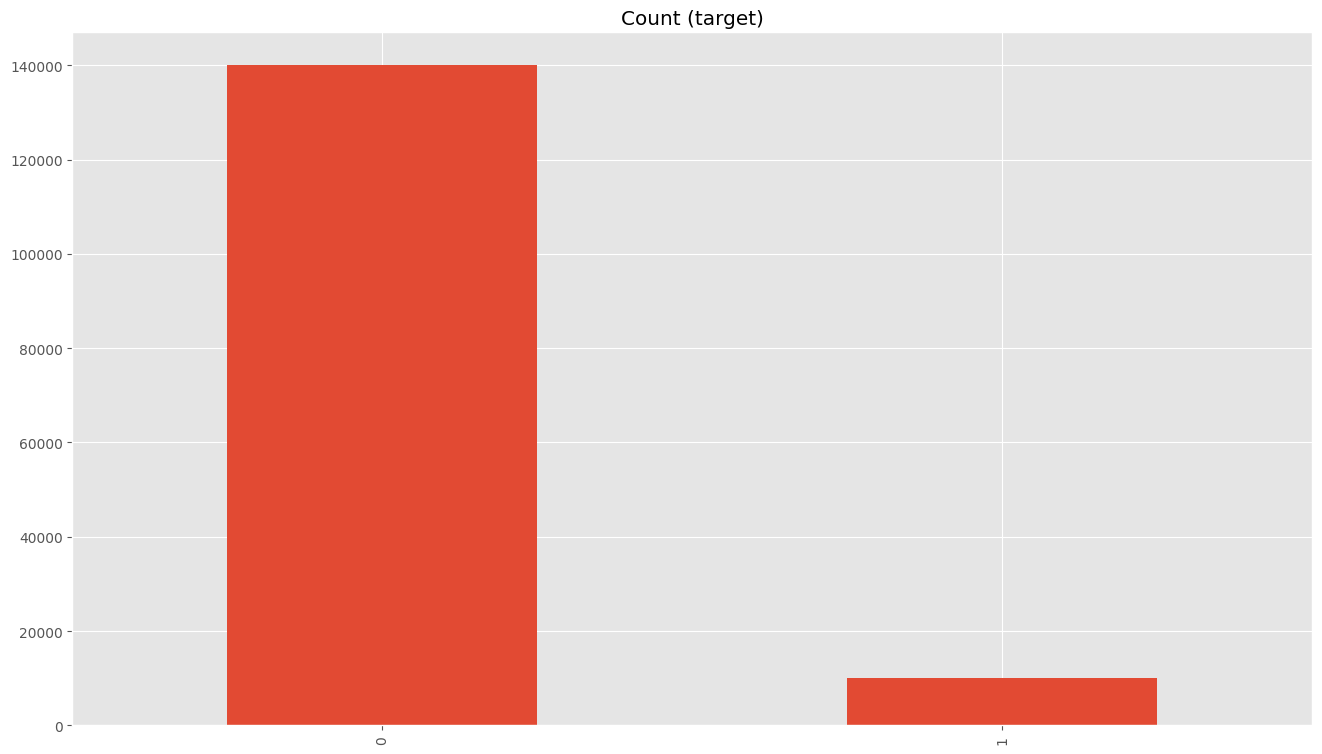

In [84]:
target_count = credito.Default.value_counts()
print('Class 0 N90:', target_count[0])
print('Class 1 M90:', target_count[1])
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

# Separando una muestra para verificar resultado de estrategias de muestreo

In [85]:
credito.columns

Index(['ID', 'Default', 'Nro_prod_financieros_deuda',
       'Nro_creditos_hipotecarios', 'Nro_dependiente', 'Mto_ingreso_mensual',
       'Prct_uso_tc', 'Nro_prestao_retrasados', 'Prct_deuda_vs_ingresos',
       'Nro_retraso_ultm3anios', 'Nro_retraso_60dias', 'Edad', 'edad_Encoded',
       'Mto_ingreso_mensual_encoded', 'edadEncoded'],
      dtype='object')

In [86]:
credito.head(3)

,ID,Default,Nro_prod_financieros_deuda,Nro_creditos_hipotecarios,Nro_dependiente,Mto_ingreso_mensual,Prct_uso_tc,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Nro_retraso_ultm3anios,Nro_retraso_60dias,Edad,edad_Encoded,Mto_ingreso_mensual_encoded,edadEncoded
0,1,1,13,6,2.0,9120,0.766127,2,0.802982,0,0,45,3.0,NaN,4.0
1,2,0,4,0,1.0,2600,0.957151,0,0.121876,0,0,40,2.0,1.0,NaN
2,3,0,2,0,0.0,3042,0.658180,1,0.085113,0,1,38,2.0,1.0,NaN


In [87]:
X = credito[['Prct_uso_tc', 'Nro_prestao_retrasados', 'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual','Nro_prod_financieros_deuda', 'Nro_retraso_60dias', 'Nro_creditos_hipotecarios','Nro_retraso_ultm3anios']]
y = credito[['Default']]

#np.random.seed(101)
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)

### **5. Estrategias de Muestreo Oversampling y Under Sampling**


In [88]:
# Solo utilizaremos Datos de entrenamiento para la estrategia
credito_train = pd.concat([X_train,y_train],axis=1)

In [89]:
#División entre máquinas con intensidad de pico
count_class_0, count_class_1 = credito_train.Default.value_counts()

# Divide by class
credi_class_0 = credito_train[credito_train['Default'] == 0]
credi_class_1 = credito_train[credito_train['Default'] == 1]

In [90]:
count_class_0, len(credi_class_0), count_class_1, len(credi_class_1)

(90979, 90979, 6521, 6521)

In [91]:
#UNDERSAMPLING
credi_class_0.sample(3)

,Prct_uso_tc,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Default
55598,0.014399,2,0.235441,10800,7,0,1,0,0
45854,0.014567,0,1.374875,4003,8,0,2,0,0
89836,0.136898,1,0.161108,5666,9,0,0,0,0


Estrategia de Muestreo under-sampling:
0    6521
1    6521
Name: Default, dtype: int64


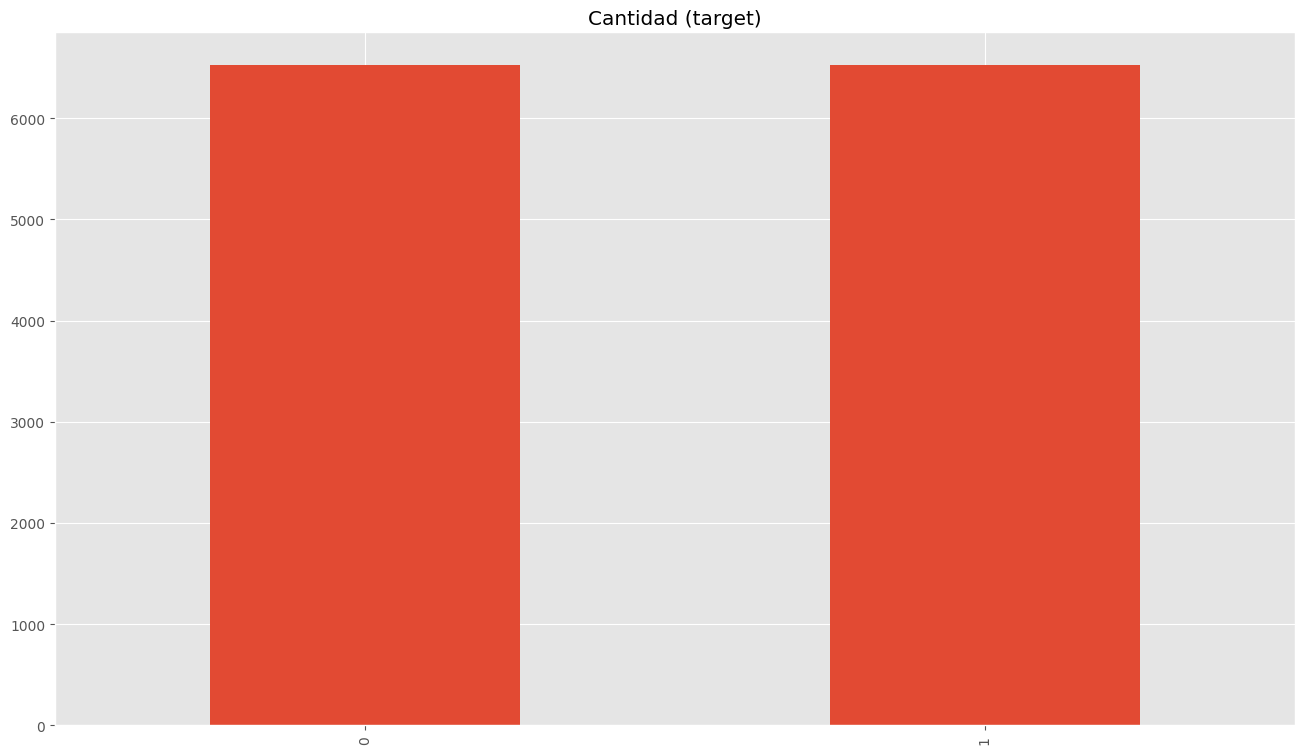

In [92]:
credi_class_0_under = credi_class_0.sample(count_class_1)
credi_under = pd.concat([credi_class_0_under, credi_class_1], axis=0)

print('Estrategia de Muestreo under-sampling:')
print(credi_under.Default.value_counts())

credi_under.Default.value_counts().plot(kind='bar', title='Cantidad (target)');

In [93]:
#OVERSAMPLING
aux = credi_class_1.head(2)
aux.sample(3,replace=True)

,Prct_uso_tc,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Default
88493,0.848693,1,0.155903,3777,3,1,0,0,1
12969,1.000000,1,0.716269,1800,6,1,0,0,1
88493,0.848693,1,0.155903,3777,3,1,0,0,1


Random over-sampling:
0    90979
1    90979
Name: Default, dtype: int64


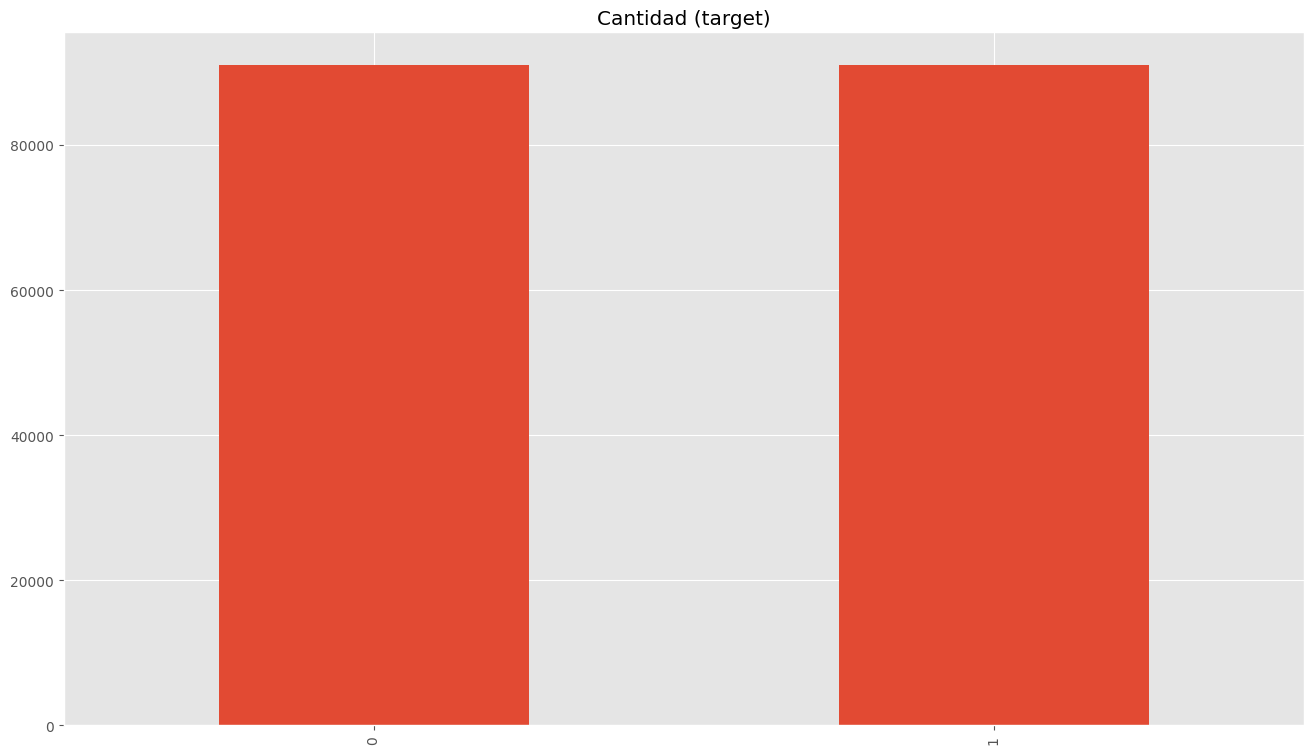

In [94]:
credi_class_1_over = credi_class_1.sample(count_class_0, replace=True)
credi_over = pd.concat([credi_class_0, credi_class_1_over], axis=0)

print('Random over-sampling:')
print(credi_over.Default.value_counts())

credi_over.Default.value_counts().plot(kind='bar', title='Cantidad (target)');

In [95]:
#credi_train.head(3)
credito_train.Default.value_counts()

0    90979
1     6521
Name: Default, dtype: int64

In [96]:
#credi_under.head(3)
credi_under.Default.value_counts()

0    6521
1    6521
Name: Default, dtype: int64

In [97]:
#credi_over.head(3)
credi_over.Default.value_counts()

0    90979
1    90979
Name: Default, dtype: int64

### **Evaluación de resultados de las estrategias de muestreo**

# Modelo de Clasificación utilizado es el arbol, es posible utilizar otros modelo de clasificación revisar en la parte final

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

In [99]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))

ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy DATOS ORIGINALES: 89.72%
Log Loss: 3.7046010226224033


Matriz de Confusión - DATOS ORIGINALES:
 [[46176  2819]
 [ 2577   928]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     48995
           1       0.25      0.26      0.26      3505

    accuracy                           0.90     52500
   macro avg       0.60      0.60      0.60     52500
weighted avg       0.90      0.90      0.90     52500



<ipython-input-100-cd695b5c7927>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-100-cd695b5c7927>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


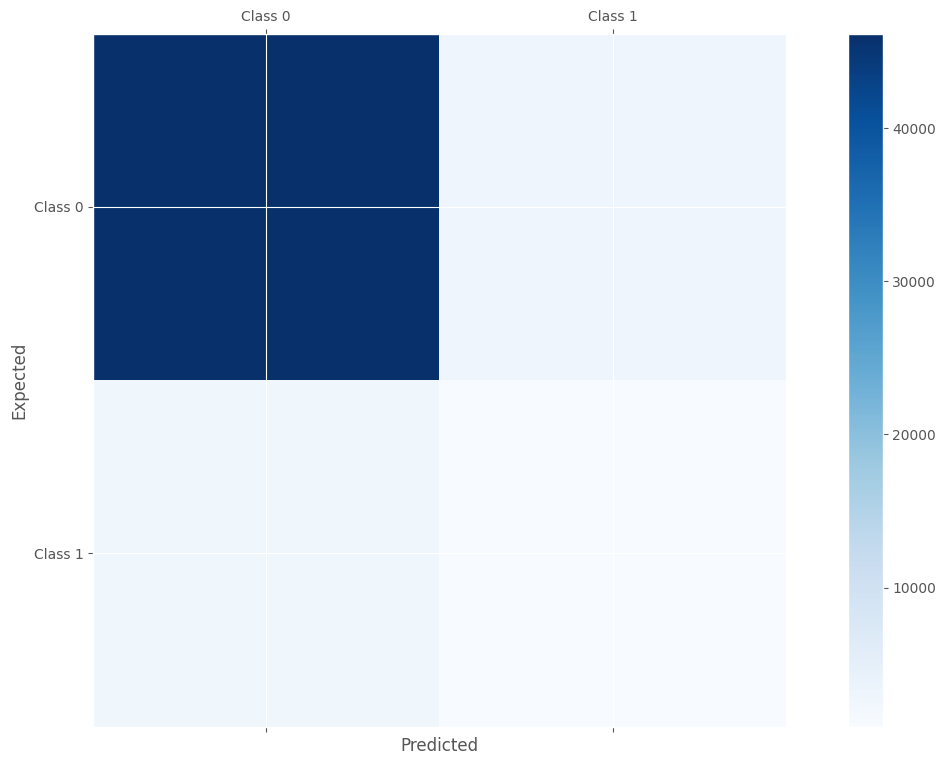

In [100]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)

print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

X_train_u= credi_under[['Prct_uso_tc', 'Nro_prestao_retrasados', 'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual','Nro_prod_financieros_deuda', 'Nro_retraso_60dias', 'Nro_creditos_hipotecarios','Nro_retraso_ultm3anios']]
y_train_u = credi_under[['Default']]

model.fit(X_train_u, y_train_u)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy UNDERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy UNDERSAMPLING: 69.53%
Log Loss: 10.983359369887545


Matriz de Confusión UNDERSAMPLING:
 [[34089 14906]
 [ 1092  2413]]
Métricas de Matriz de Confusión - UNDERSAMPLING:
               precision    recall  f1-score   support

           0       0.97      0.70      0.81     48995
           1       0.14      0.69      0.23      3505

    accuracy                           0.70     52500
   macro avg       0.55      0.69      0.52     52500
weighted avg       0.91      0.70      0.77     52500



<ipython-input-102-73540b3e6ad4>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-102-73540b3e6ad4>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


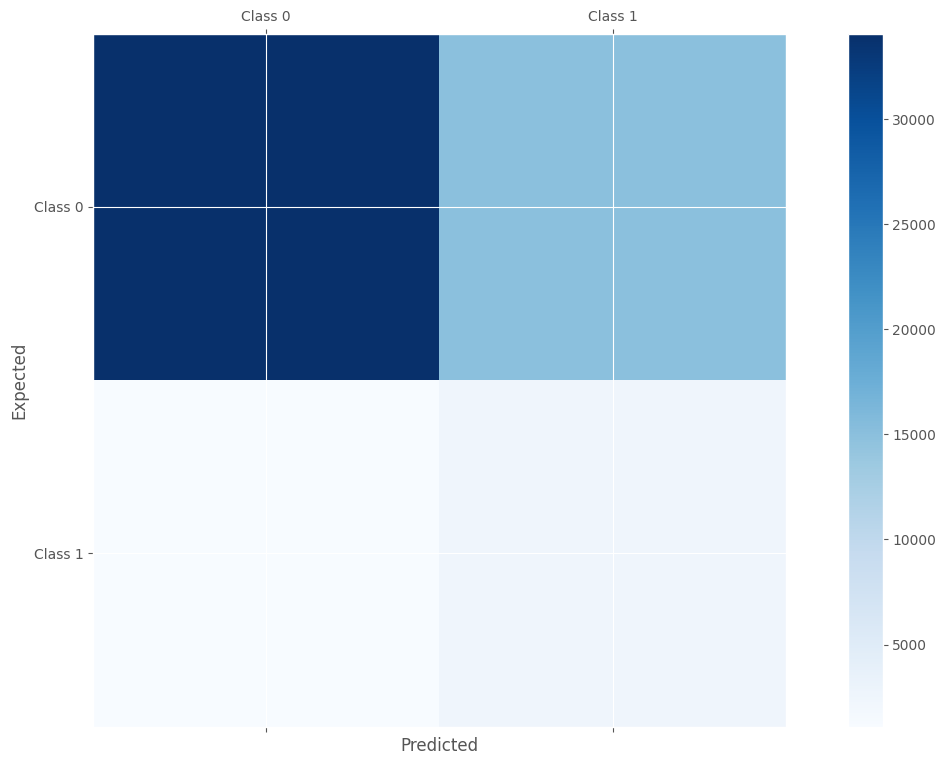

In [102]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión UNDERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - UNDERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

X_train_o= credi_over[['Prct_uso_tc', 'Nro_prestao_retrasados', 'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual','Nro_prod_financieros_deuda', 'Nro_retraso_60dias', 'Nro_creditos_hipotecarios','Nro_retraso_ultm3anios']]
y_train_o = credi_over[['Default']]

model.fit(X_train_o, y_train_o)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy OVERSAMPLING: 89.82%
Log Loss: 3.6702737336803866


Matriz de Confusión OVERSAMPLING:
 [[46248  2747]
 [ 2599   906]]
Métricas de Matriz de Confusión - OVERSAMPLING:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     48995
           1       0.25      0.26      0.25      3505

    accuracy                           0.90     52500
   macro avg       0.60      0.60      0.60     52500
weighted avg       0.90      0.90      0.90     52500



<ipython-input-104-a80f9b956ac6>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-104-a80f9b956ac6>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


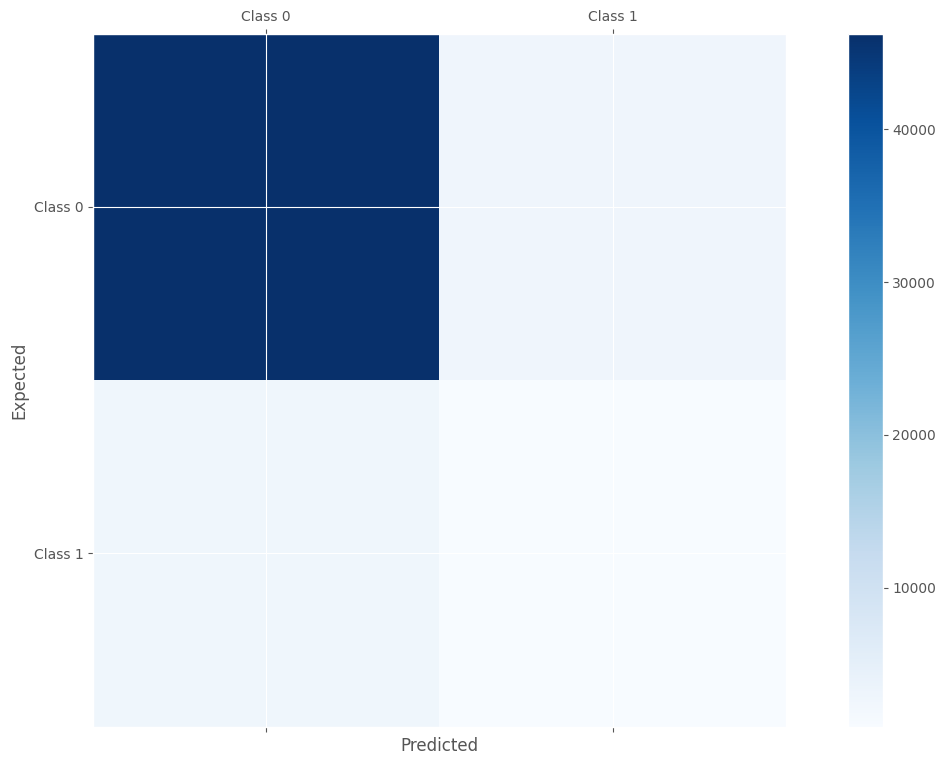

In [104]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión OVERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - OVERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()